In [75]:
import pandas as pd 
import numpy as np
import os
from matplotlib import pyplot as plt
from matplotlib import patches as patches
import seaborn as sns
from matplotlib.colors import ListedColormap
import warnings

warnings.filterwarnings('ignore')

In [39]:
folder = "../../Data/Training/"
file = "Raw_training_data_full_error_flag.csv"
# filepath = os.getcwd() + folder + file
filepath = folder + file
data = pd.read_csv(filepath, parse_dates = ["TIMESTAMP"])
data

/var/folders/b2/nb86kq1j7zx8sqjthk_hy6vc0000gn/T/ipykernel_68497/2414208837.py:5: DtypeWarning: Columns (40) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv(filepath, parse_dates = ["TIMESTAMP"])


TIMESTAMP  Redox_Avg(1)  Redox_Avg(2)  Redox_Avg(3)  \
0      2022-04-12 09:20:00           138           301           175   
1      2022-04-12 09:25:00           138           301           176   
2      2022-04-12 09:30:00           138           301           175   
3      2022-04-12 09:35:00           138           301           175   
4      2022-04-12 09:40:00           138           301           175   
...                    ...           ...           ...           ...   
606197 2023-12-31 07:15:00           650           721           744   
606198 2023-12-31 07:20:00           650           721           744   
606199 2023-12-31 07:25:00           650           721           744   
606200 2023-12-31 07:30:00           651           721           744   
606201 2023-12-31 07:35:00           651           721           744   

        Redox_Avg(4)  Redox_Avg(5)  Temp_T12_Avg(1)  EC_Avg(1)  \
0                 84            61              0.2         80   
1                 84            61              0.2         80   
2                 84            61              0.2         80   
3                 84            61              0.2         80   
4                 84            61              0.2         80   
...              ...           ...              ...        ...   
606197           684           619              0.4        100   
606198           685           619              0.4        100   
606199           684           619              0.4        100   
606200           684           619              0.4        100   
606201           685           619              0.4        100   

        Temp_T12_Avg(2)  EC_Avg(2)  ...  Redox_Avg(1)_sigma_b  \
0                   0.3        390  ...              0.000000   
1                   0.3        390  ...              0.000000   
2                   0.3        390  ...              0.000000   
3                   0.3        390  ...              0.000000   
4                   0.3        390  ...              0.000000   
...                 ...        ...  ...                   ...   
606197              0.9         98  ...             28.011955   
606198              0.9         98  ...             28.098859   
606199              0.9         98  ...             28.177810   
606200              0.9         98  ...             28.255355   
606201              0.9         98  ...             28.314256   

        Redox_Avg(1)_sigma_f  Redox_Avg(2)_sigma_b  Redox_Avg(2)_sigma_f  \
0                   0.565685              0.400000              0.606218   
1                   0.565685              0.372678              0.608605   
2                   0.565685              0.349927              0.610819   
3                   0.565685              0.330719              0.612862   
4                   0.565685              0.314270              0.614736   
...                      ...                   ...                   ...   
606197              4.161055              0.486595              0.388298   
606198              4.110471              0.487750              0.384187   
606199              4.057681              0.488851              0.379967   
606200              4.002596              0.489898              0.375633   
606201              3.958270              0.490892              0.371181   

        Redox_Avg(3)_sigma_b  Redox_Avg(3)_sigma_f  Redox_Avg(4)_sigma_b  \
0                   0.489898              2.971851              0.000000   
1                   0.471405              2.972945              0.000000   
2                   0.494872              2.963912              0.000000   
3                   0.500000              2.963237              0.000000   
4                   0.496904              2.961718              0.000000   
...                      ...                   ...                   ...   
606197              0.699839              0.399875              0.441333   
606198              0.696401              0.393415       

#### Turning redox_error_flag into boolean 

In [40]:
# data.Redox_error_flag
def nan_to_false(x):
    if np.isnan(x): return False
    elif x == True: return True
    
data["Redox_error_flag"] = data["Redox_error_flag"].apply(nan_to_false)

In [41]:
# df = data.drop(['log_redox(1)', 'log_redox(2)', 'log_redox(3)', 'log_redox(4)', 'log_redox(5)'], axis = 1)

In [71]:
import datetime
df = data[[col for col in data.columns if col not in ['Redox_Avg(1)_sigma_b', 'Redox_Avg(1)_sigma_f', 'Redox_Avg(2)_sigma_b','Redox_Avg(2)_sigma_f', 'Redox_Avg(3)_sigma_b', 'Redox_Avg(3)_sigma_f',
       'Redox_Avg(4)_sigma_b', 'Redox_Avg(4)_sigma_f', 'Redox_Avg(5)_sigma_b',
       'Redox_Avg(5)_sigma_f']]]
df1 = df.loc[data["TIMESTAMP"]< datetime.datetime(2023, 1, 1),:]
df2 = df.loc[data["TIMESTAMP"] >= datetime.datetime(2023, 1, 1),:]

#### Functions for creating a code for the error type and the list of sensor (1-5) specific features 

In [72]:
import re

def sensor_specific_features(redox_error_feature: str):
    
      # print(re.search("[1-5]",error_flag).start())
      i = int(redox_error_feature[re.search("[1-5]",redox_error_feature).start() : re.search("[1-5]",redox_error_feature).start()+1])

      level_features_names = [x for x in df.columns if ((re.search("\(" + str(i) + "\)", x)) or (re.search("WC" + str(i), x))) and ((re.search("Redox_error_flag", x) == None))]
      
      return(level_features_names, i)

def error_source(x):
    if ((x[0] == False) & (x[1] == False)): return 0
    elif ((x[0] == True) & (x[1] == False)): return 1
    elif ((x[0] == False) & (x[1] == True)): return 2
    else: return 3

In [73]:
common_features = ['Water_level_Avg', 'Temp_ottpls_Avg','BatterymV_Min']

# classes = ["Normal", "missing redox", "error_flag", "both"]
# colors = ListedColormap(["blue", "red", "green", "orange"])

#### Plotting the variables data by sensor level (all the pits)

---------------------------------------------------------------------------------------- graphs of the variables for the sensor # 1  -----------------------------------------------------------------------------------------------


<Figure size 640x480 with 0 Axes>

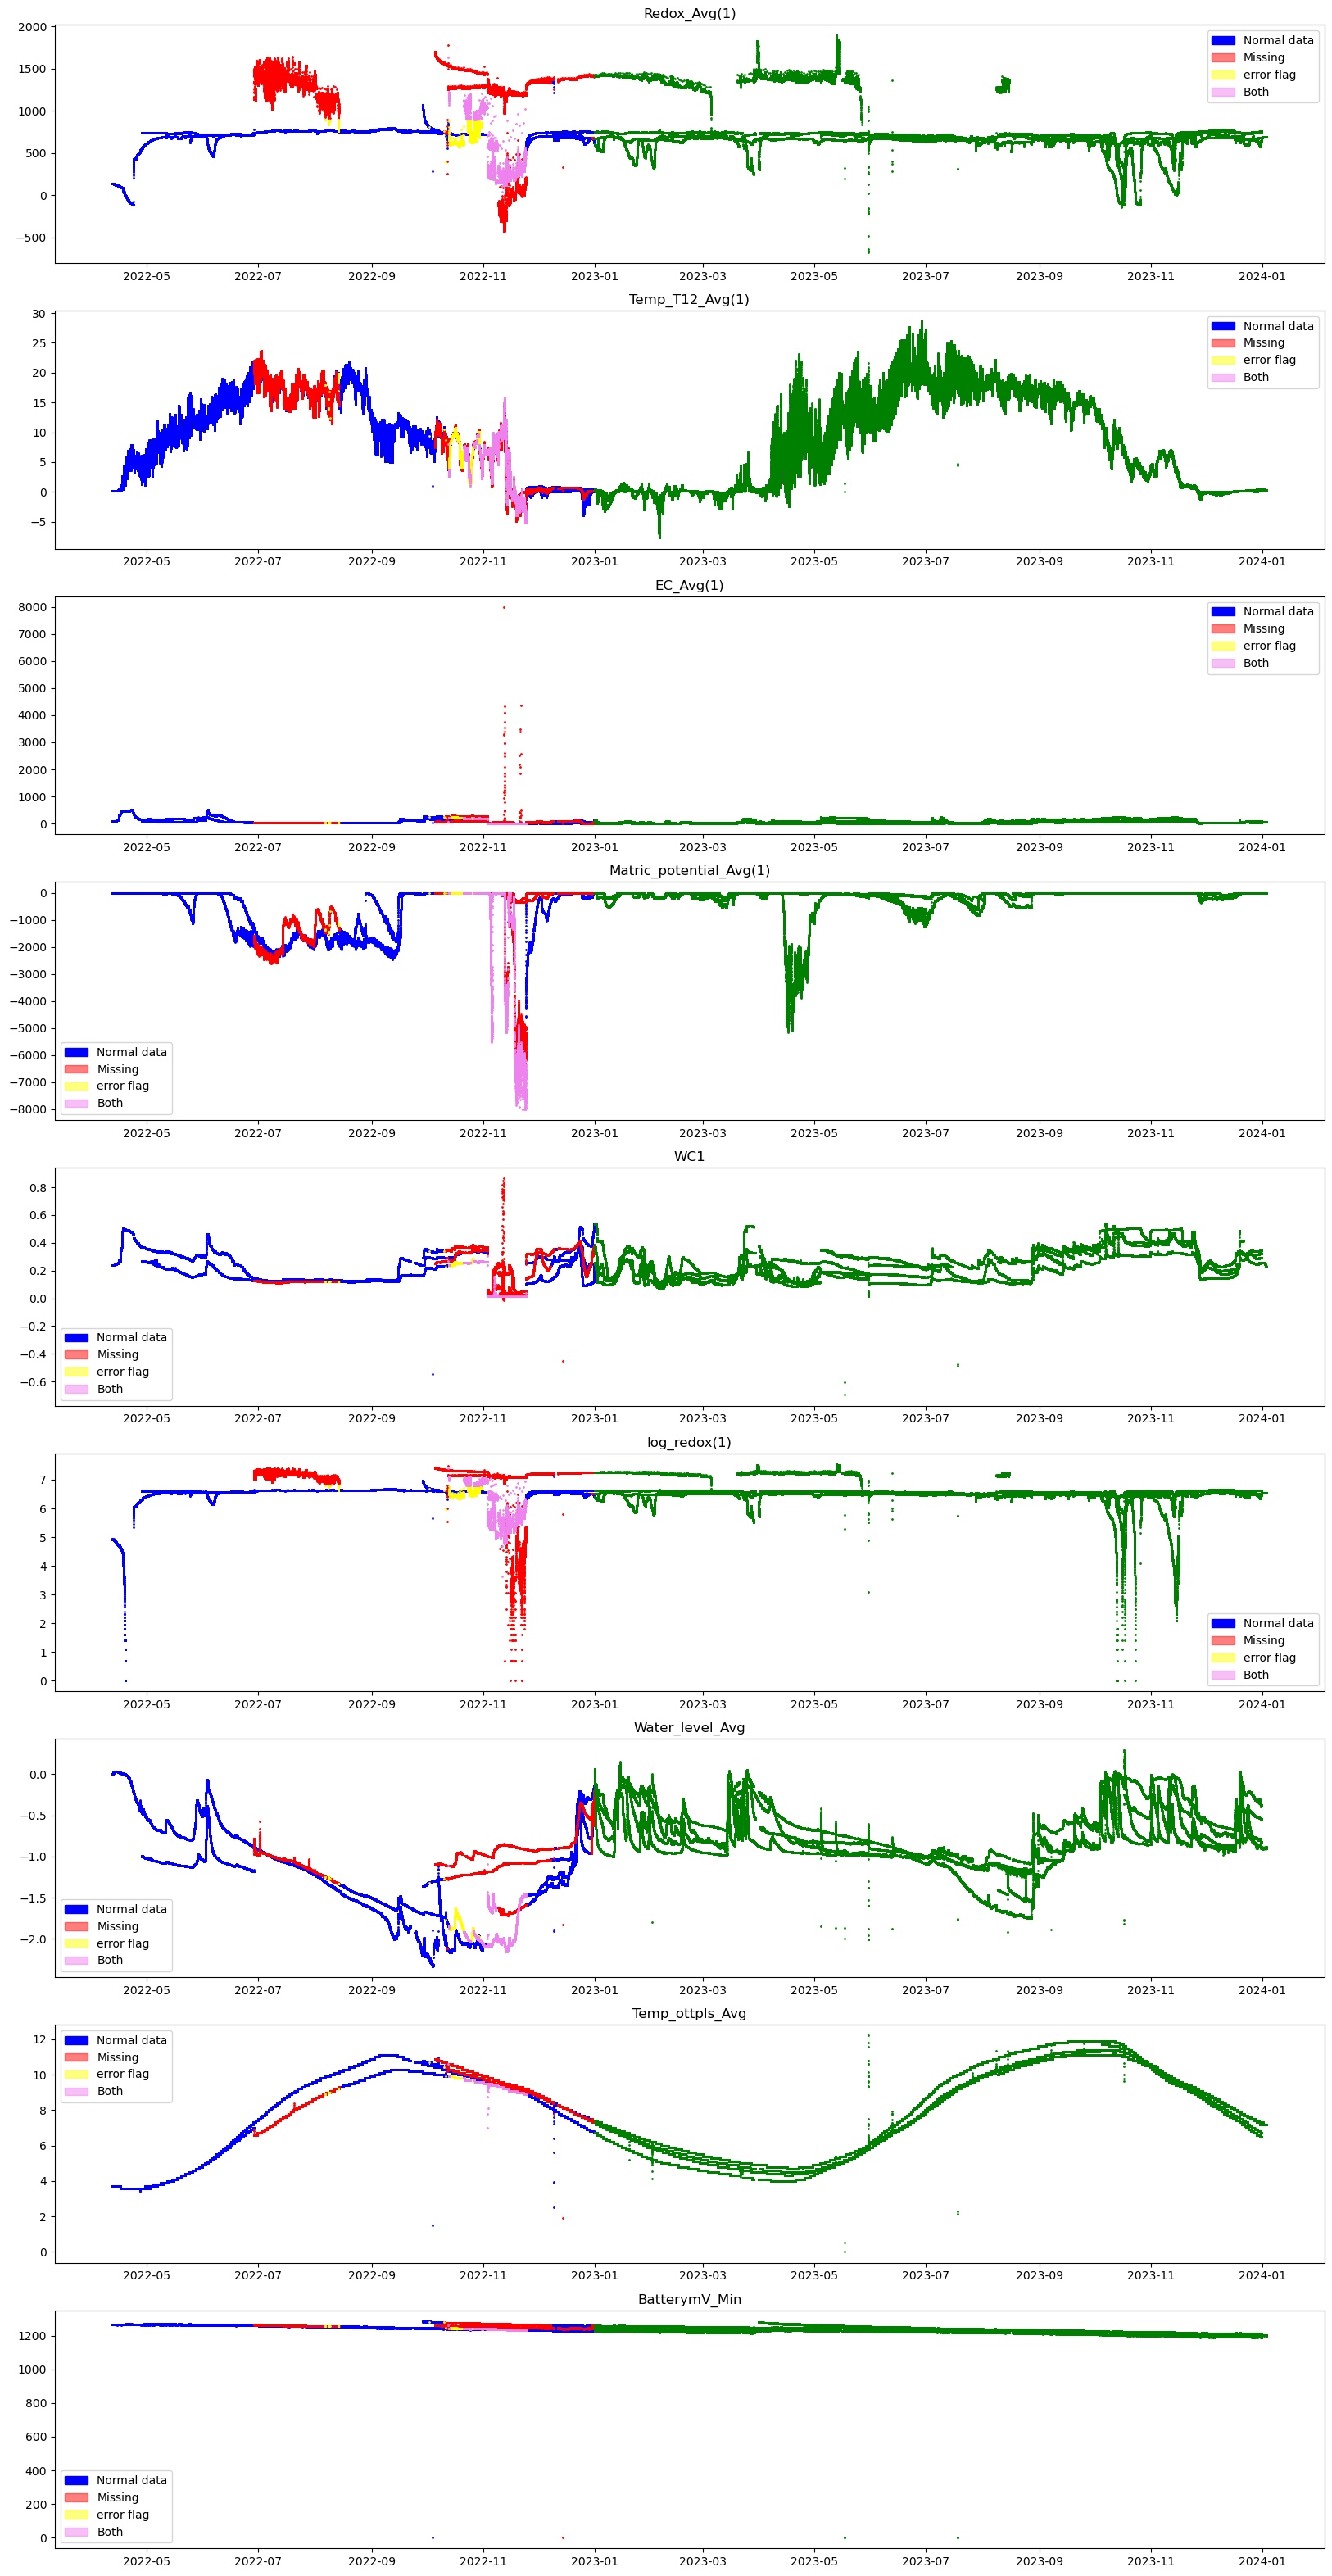

---------------------------------------------------------------------------------------- graphs of the variables for the sensor # 2  -----------------------------------------------------------------------------------------------


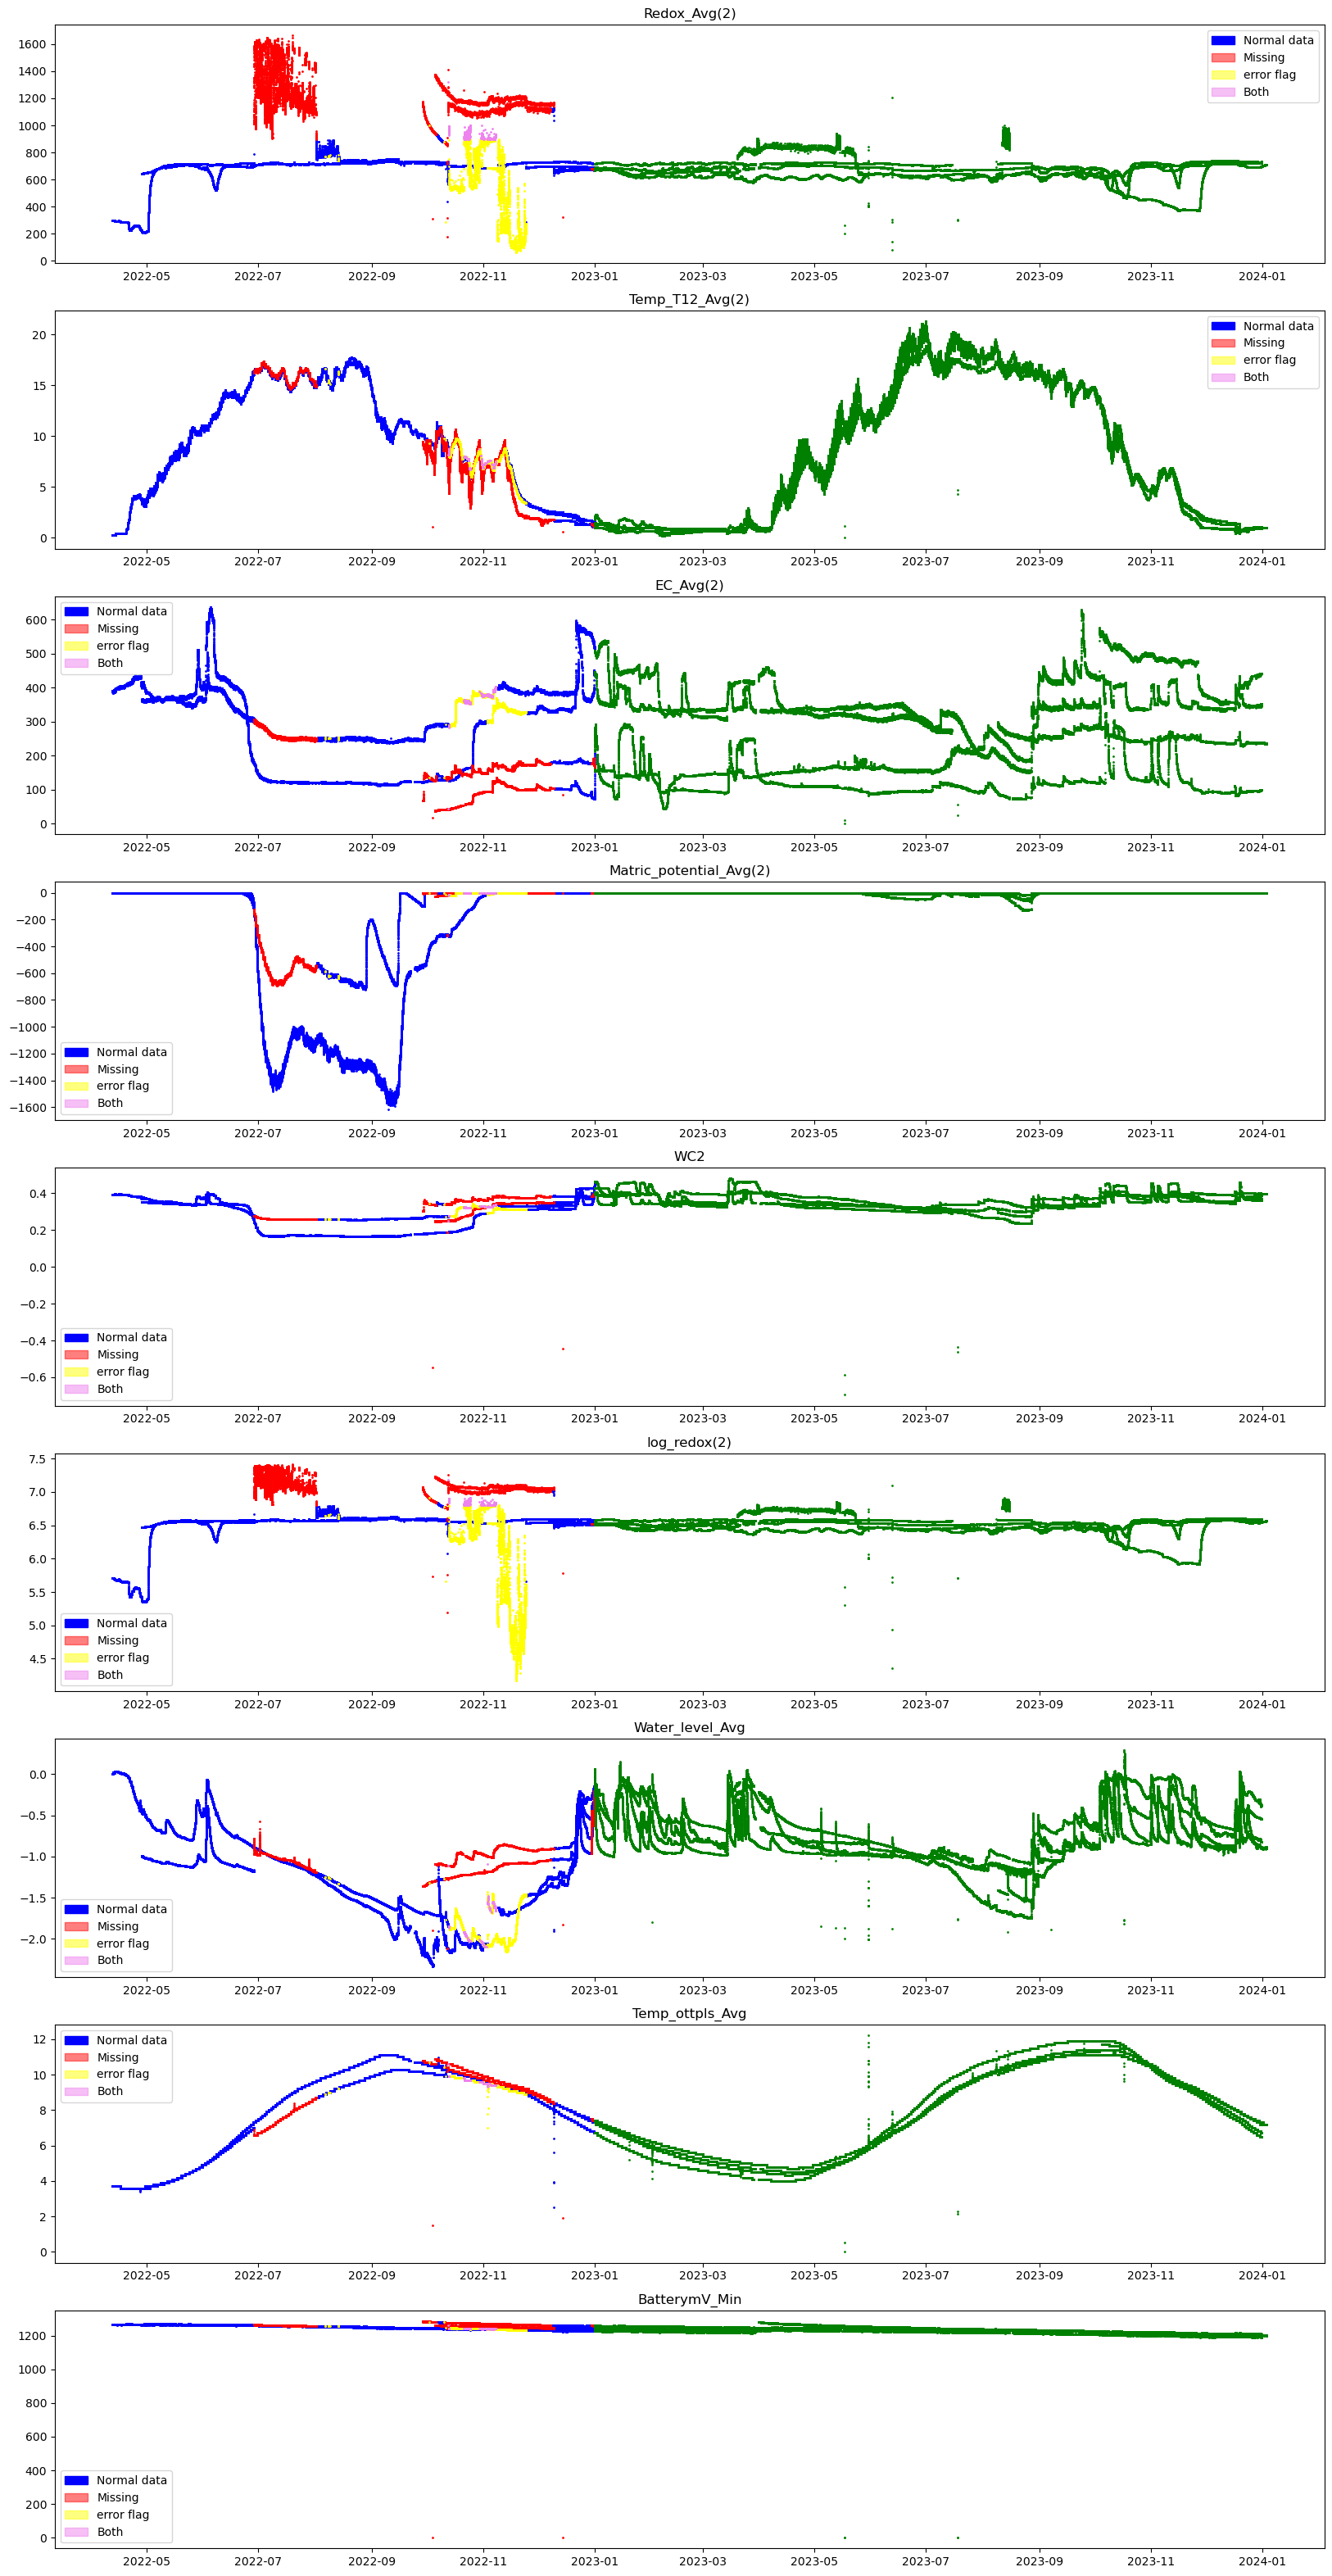

---------------------------------------------------------------------------------------- graphs of the variables for the sensor # 3  -----------------------------------------------------------------------------------------------


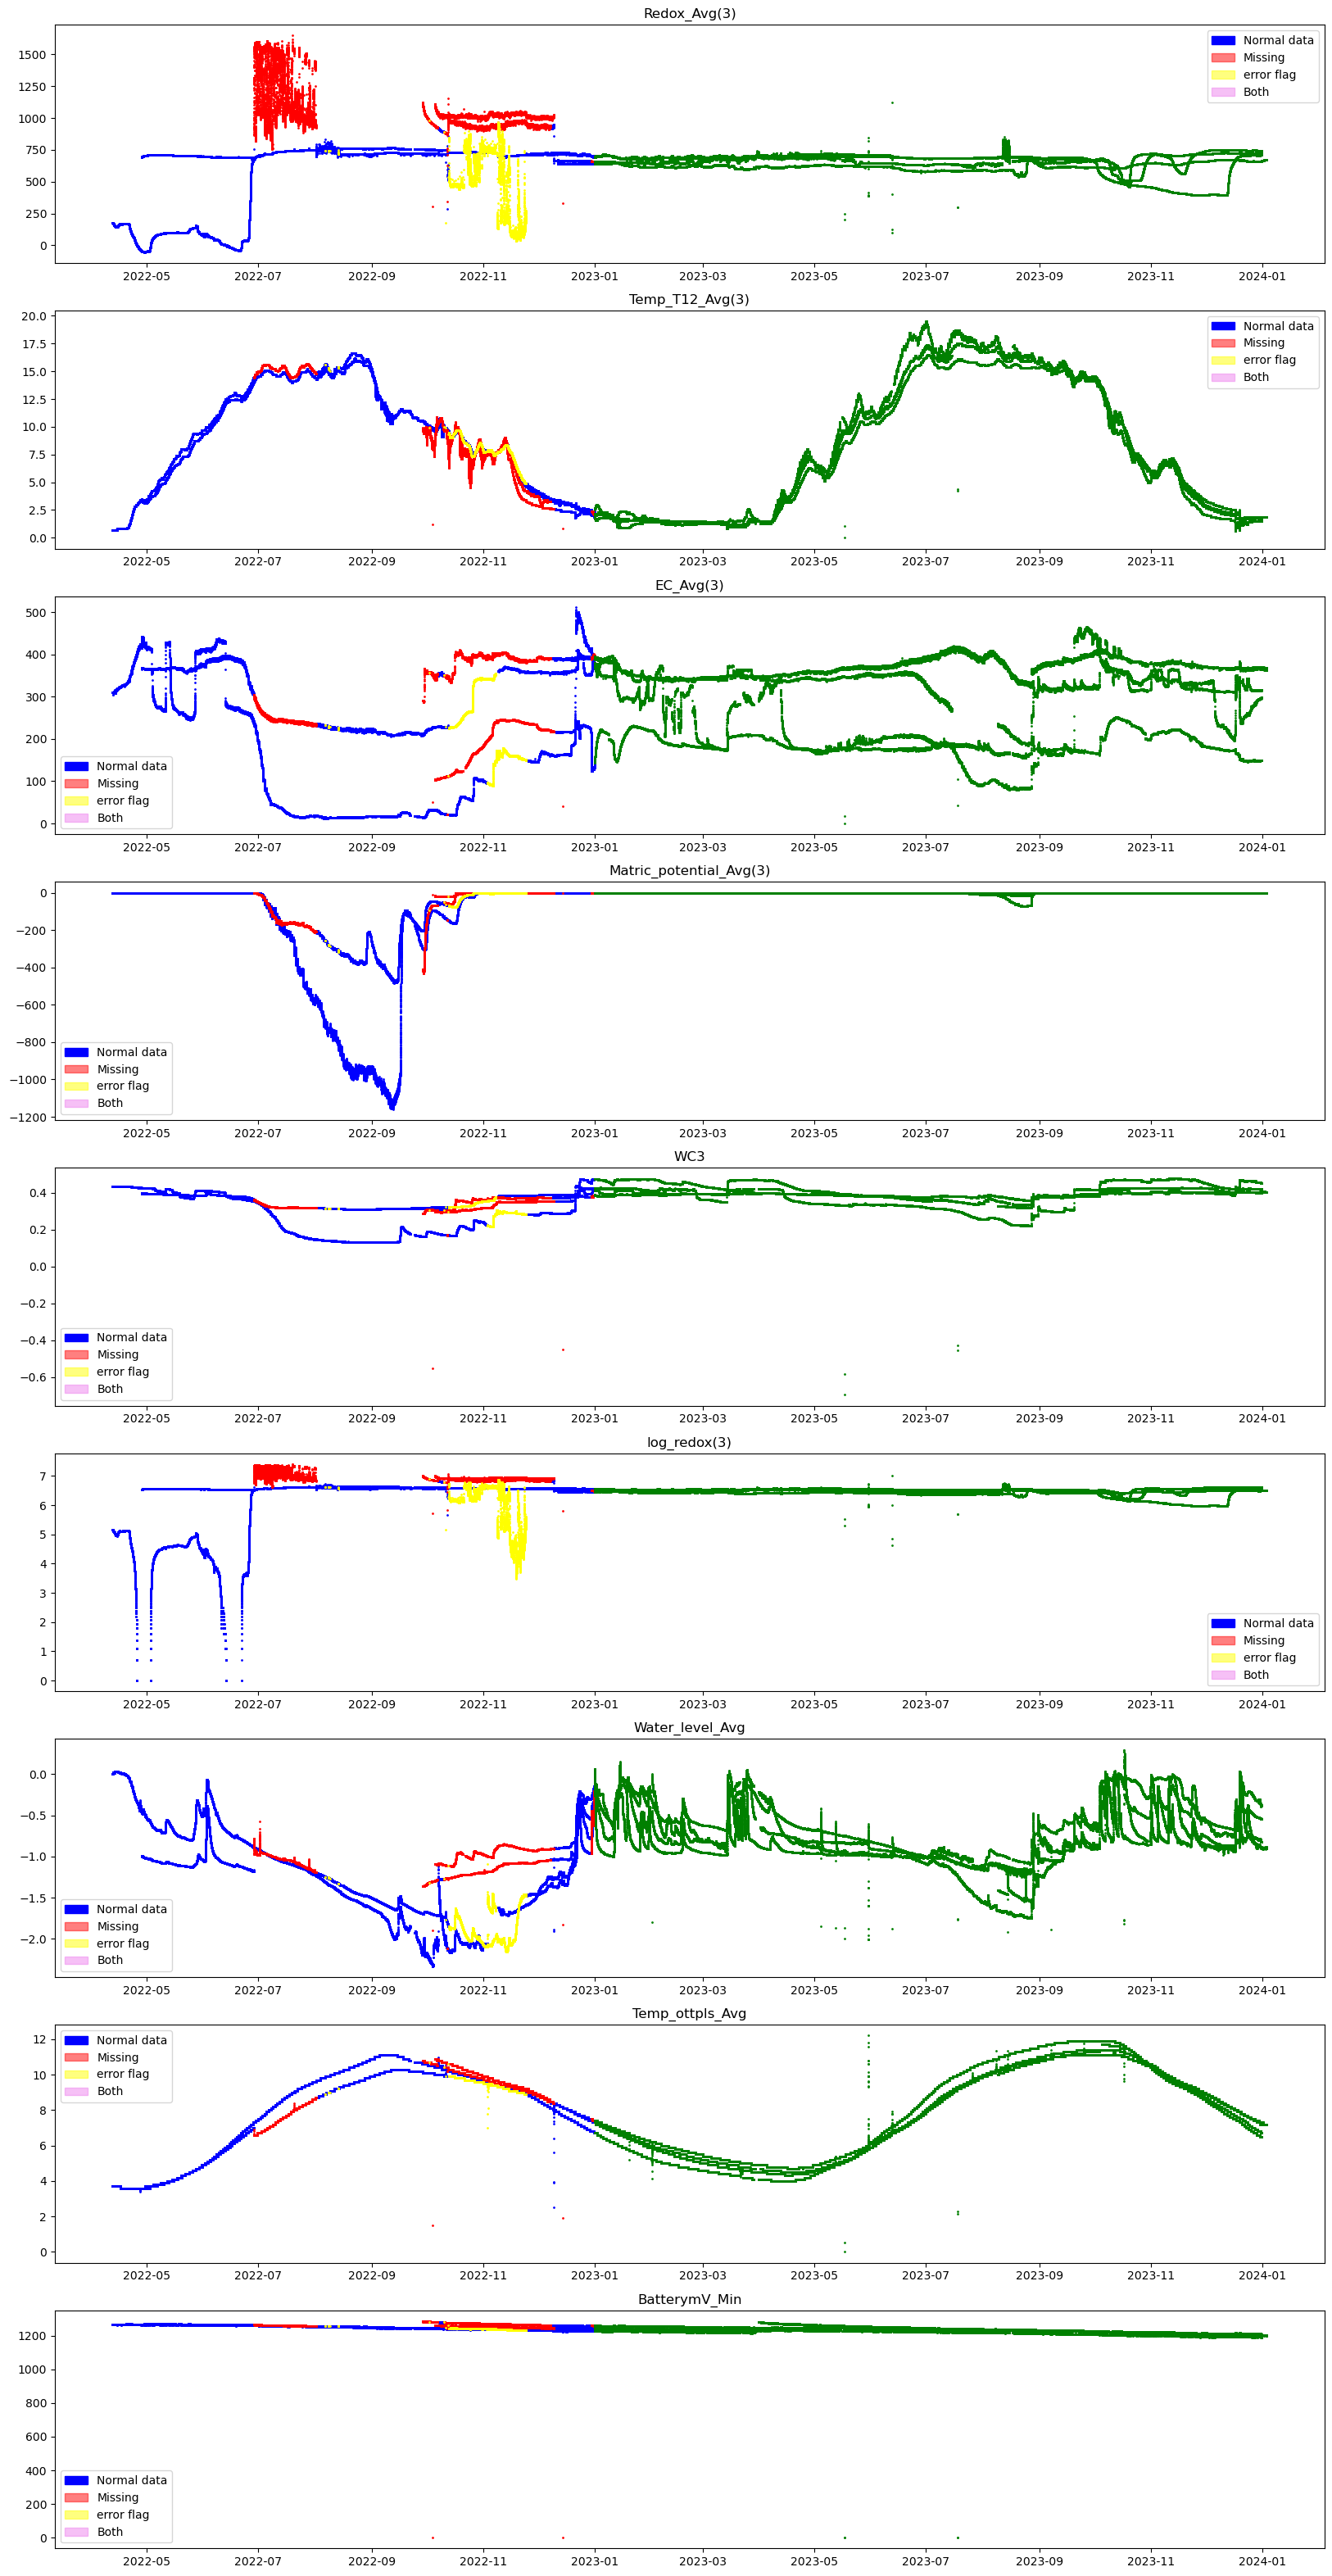

---------------------------------------------------------------------------------------- graphs of the variables for the sensor # 4  -----------------------------------------------------------------------------------------------


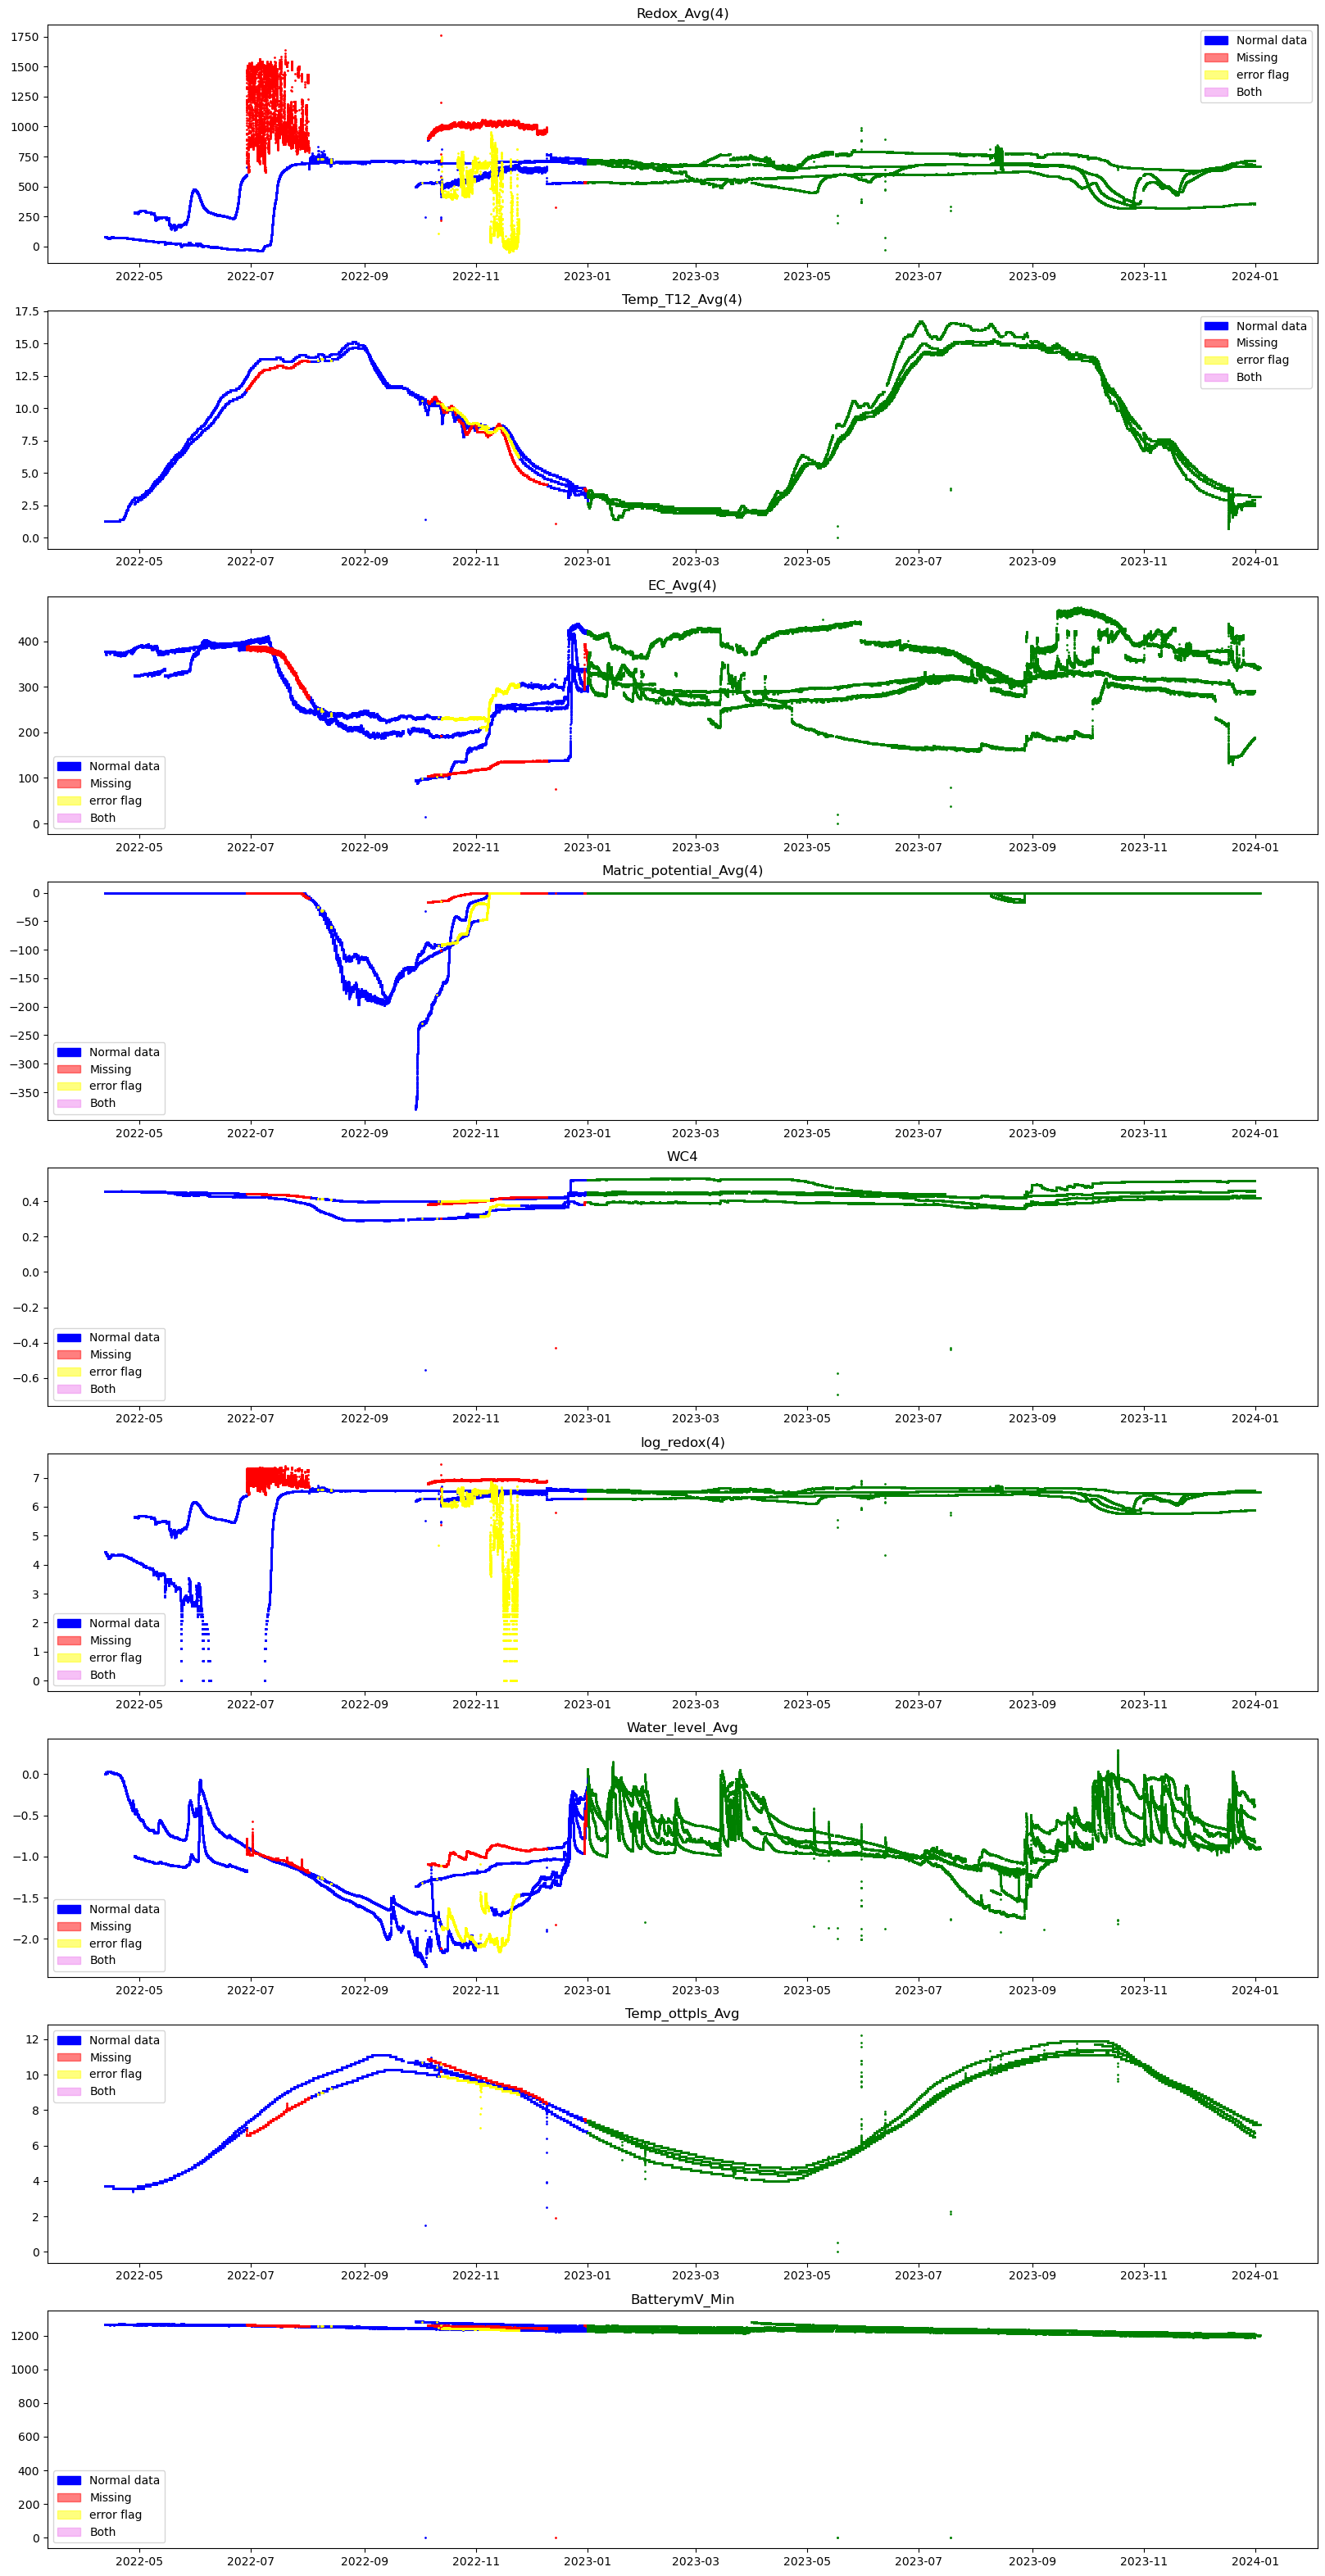

---------------------------------------------------------------------------------------- graphs of the variables for the sensor # 5  -----------------------------------------------------------------------------------------------


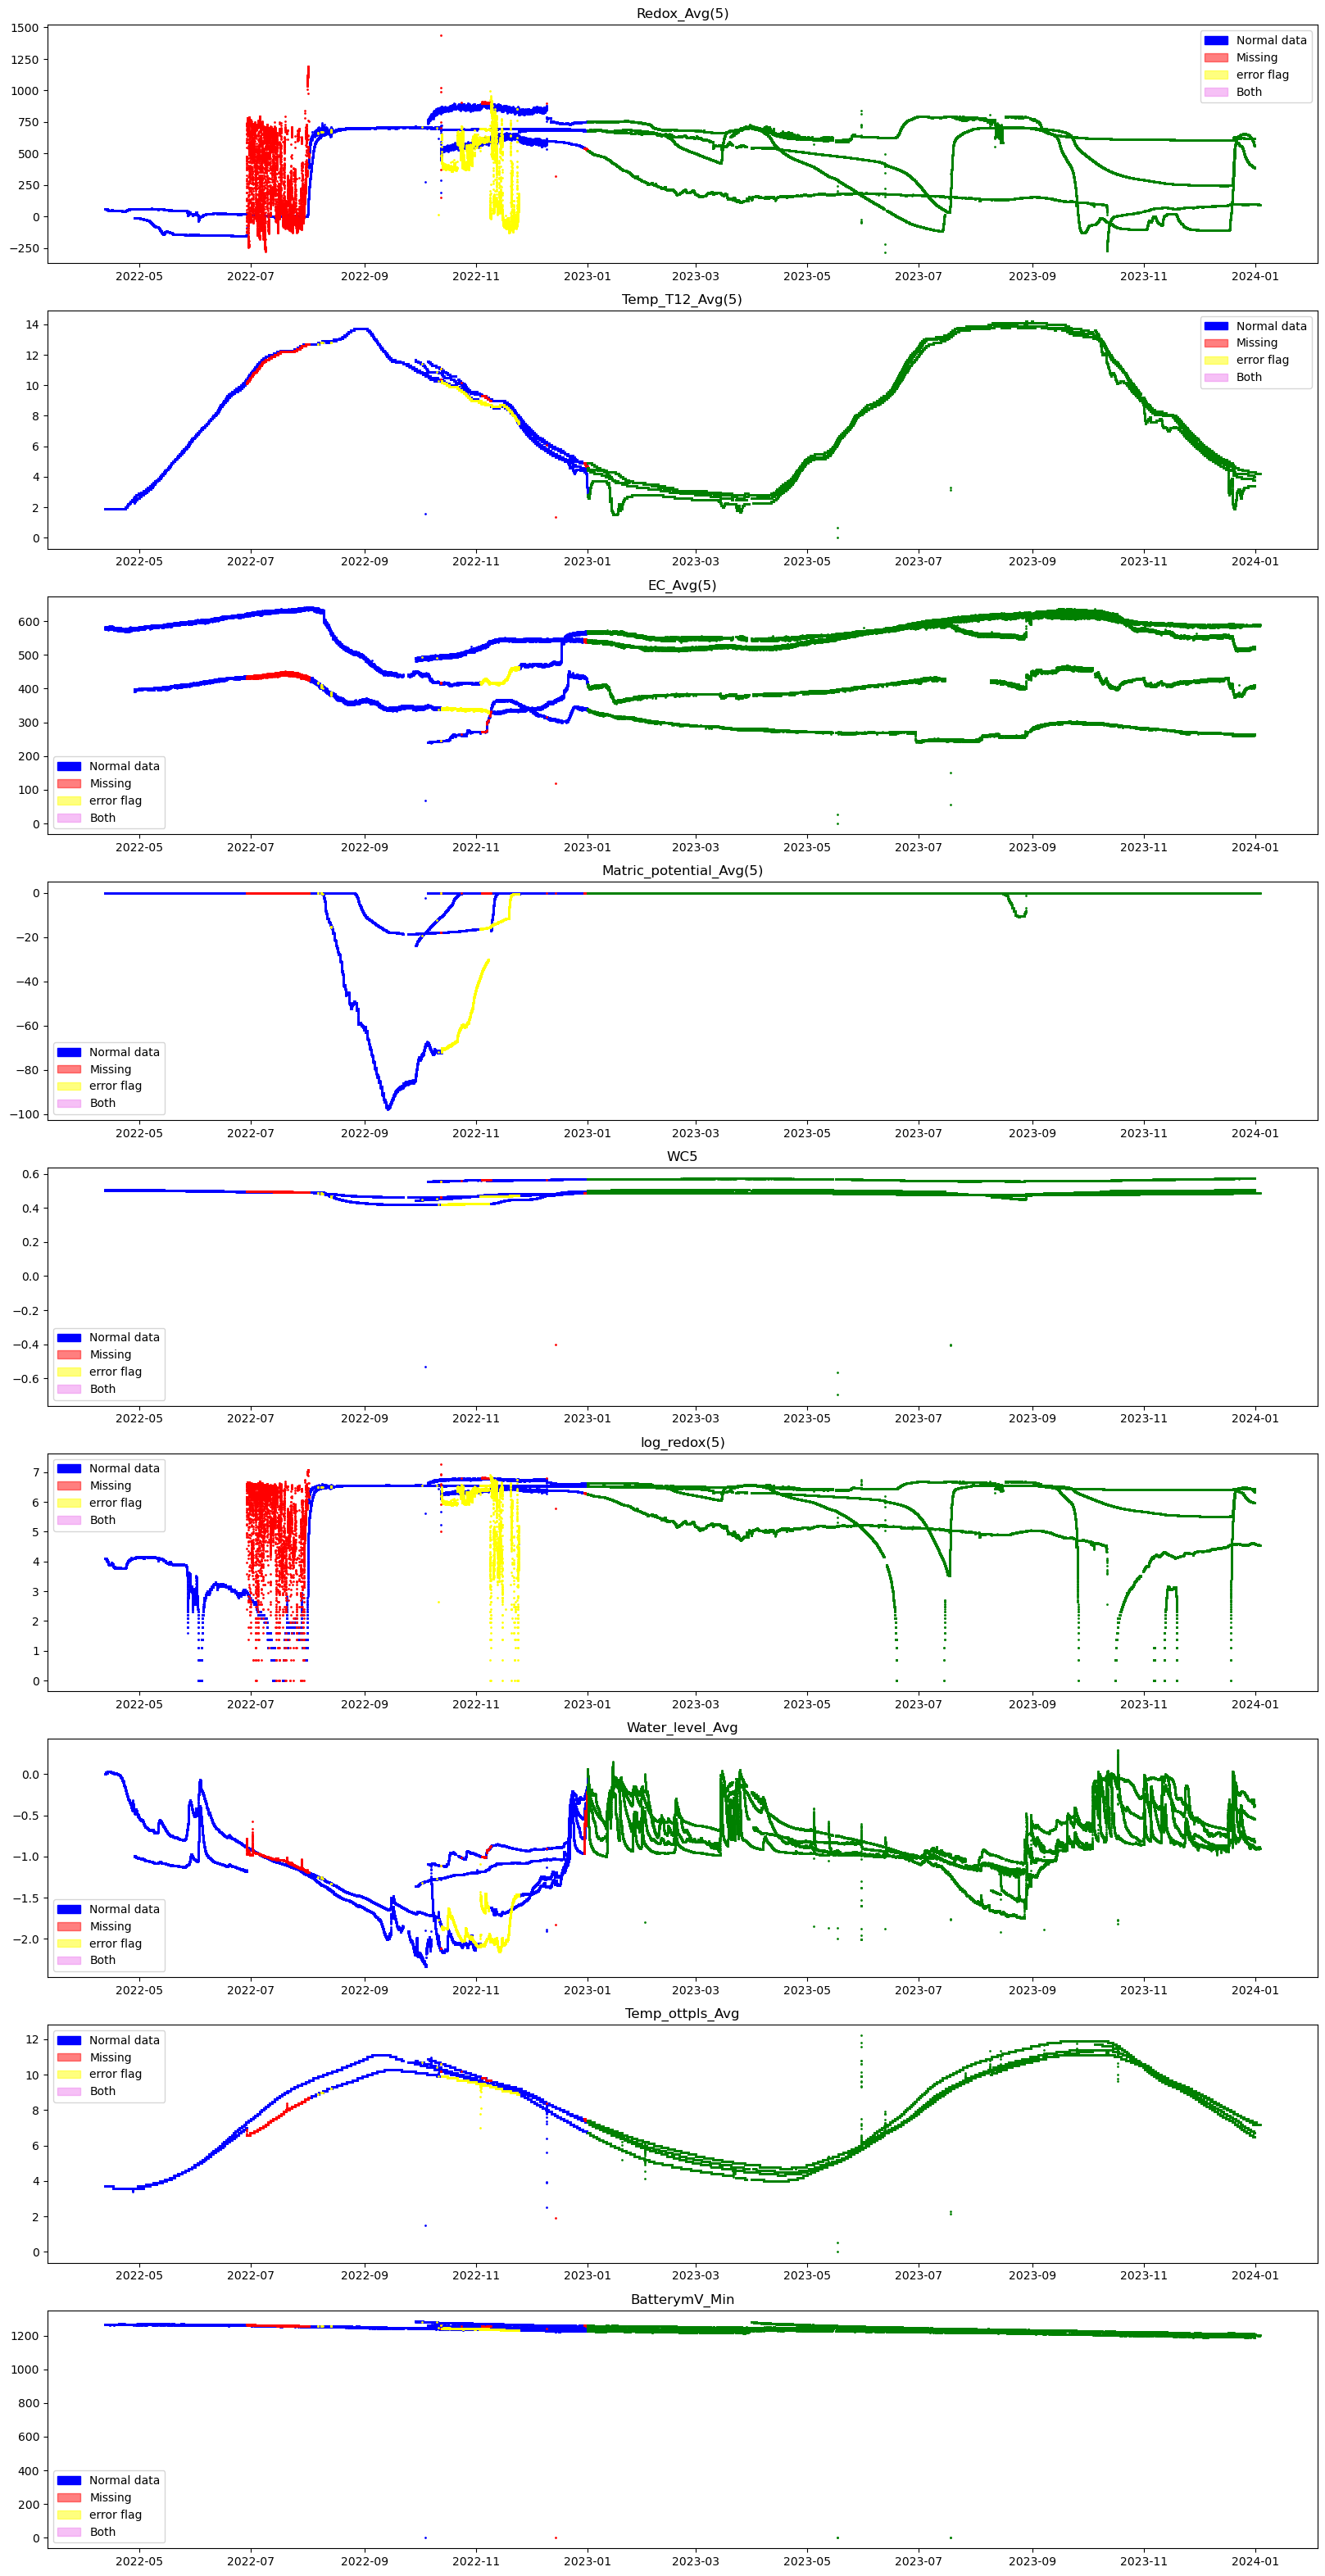

In [76]:
plt.subplots_adjust(hspace = 2.0) 

colors = {0: "blue", 1: "red", 2: "yellow", 3: "violet"}
labels = {0: "normal", 1: "missing", 2: "error_flag", 3: "both"}

blue_patch = patches.Patch(color='blue', label= 'Normal data')
red_patch = patches.Patch(color = "red", alpha = 0.5, label = "Missing")
yellow_patch = patches.Patch(color = "yellow", alpha = 0.5, label = "error flag")
violet_patch = patches.Patch(color = "violet", alpha = 0.5, label = "Both")

for error_flag_feature in ['Redox_error_flag(1)', 'Redox_error_flag(2)', 'Redox_error_flag(3)', 'Redox_error_flag(4)', 'Redox_error_flag(5)']:
    
    level_specific, j = sensor_specific_features(error_flag_feature)
    
    print(f"=============================================================================================================================================================================================================================")
    print(f"---------------------------------------------------------------------------------------- graphs of the variables for the sensor # {j}  -----------------------------------------------------------------------------------------------")


    sensor_features = level_specific + common_features
    
    fig, axes = plt.subplots(nrows = len(sensor_features), ncols = 1, figsize = (20,40))
    
    for i, sensor_feature in enumerate(sensor_features):
        
        c = df1[[error_flag_feature]+['Redox_error_flag']].apply(error_source, axis = 1)
        
        for type in np.arange(4):
            axes[i].scatter(df1.loc[c == type, ["TIMESTAMP"]], df1.loc[c == type, [sensor_feature]], c = colors[type], s = 1)
        axes[i].scatter(df2["TIMESTAMP"], df2[sensor_feature], c = "green", s = 1)      
        axes[i].legend(handles = [blue_patch, red_patch, yellow_patch, violet_patch])
        axes[i].set_title(f"{sensor_feature}")

    plt.show()
    

#### Plotting the variables data by pits (all levels)

In [60]:
features = list()
for error_flag_feature in ['Redox_error_flag(1)', 'Redox_error_flag(2)', 'Redox_error_flag(3)', 'Redox_error_flag(4)', 'Redox_error_flag(5)']:
        level_specific, j = sensor_specific_features(error_flag_feature)
        
        features.append(level_specific)
    
features_zip = zip(*features)


----------------------------------------------------------------------------------------graphs of the variables for the pit # 1 -----------------------------------------------------------------------------------------------


<Figure size 640x480 with 0 Axes>

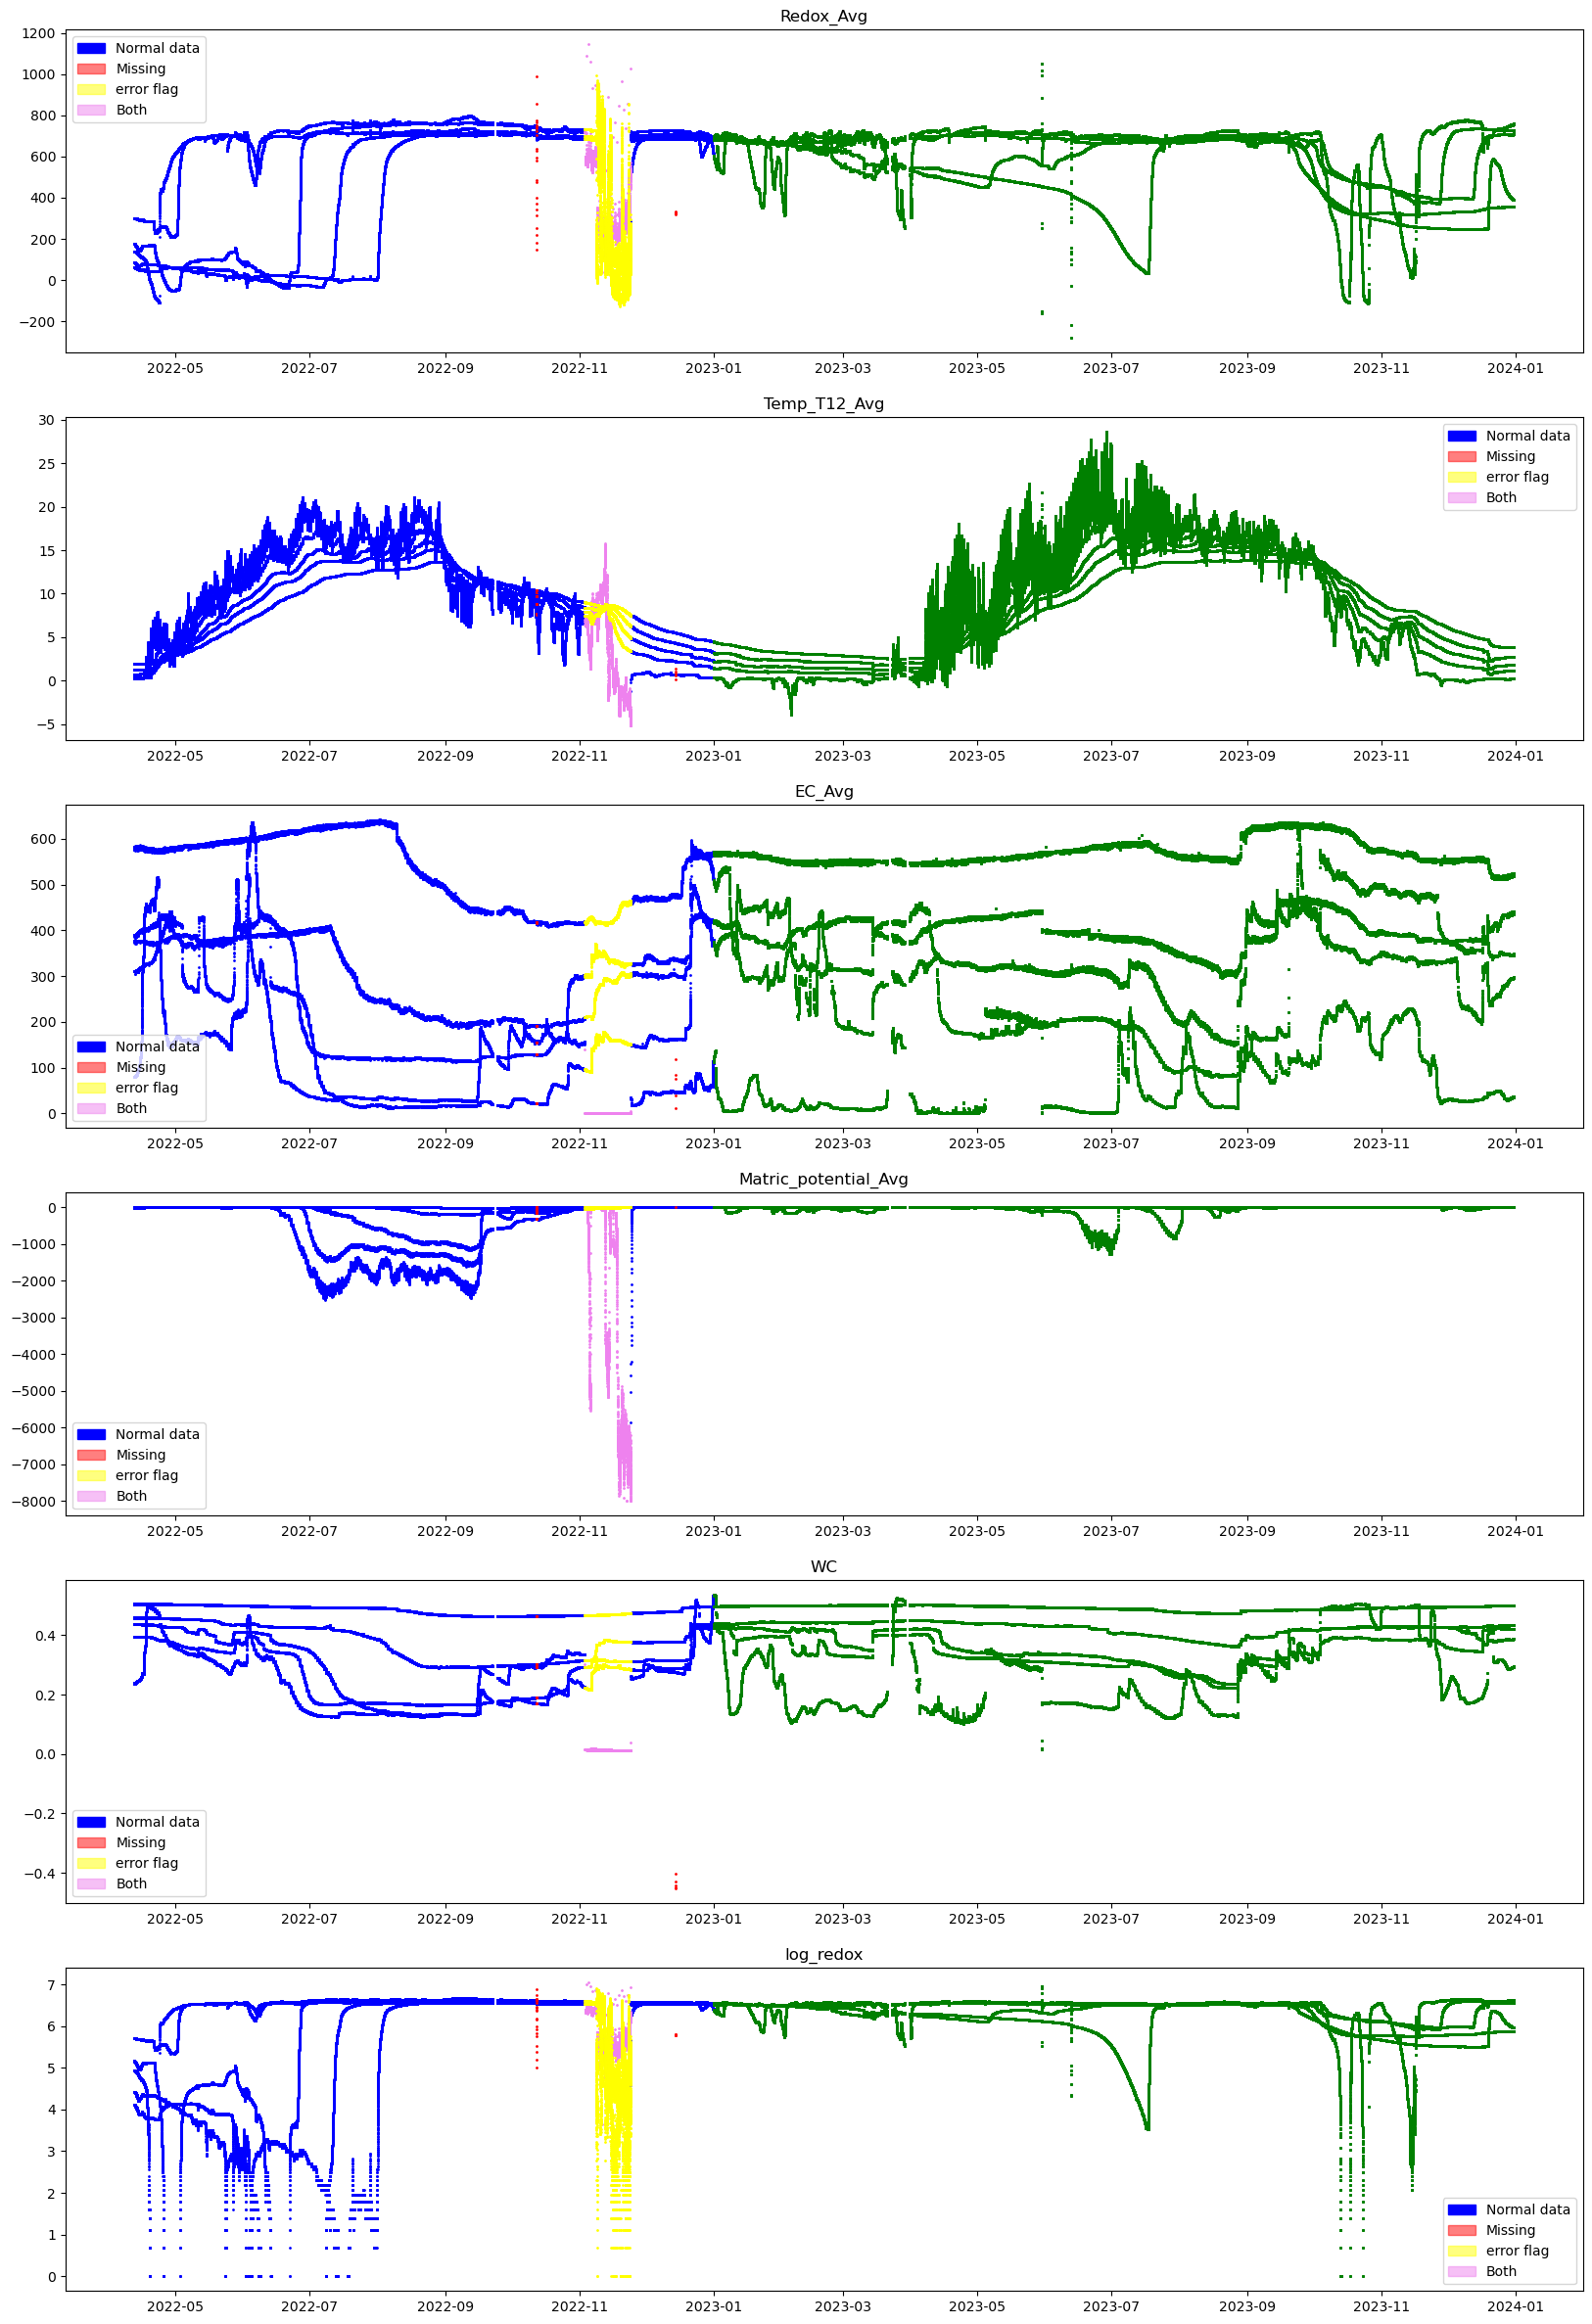

----------------------------------------------------------------------------------------graphs of the variables for the pit # 2 -----------------------------------------------------------------------------------------------


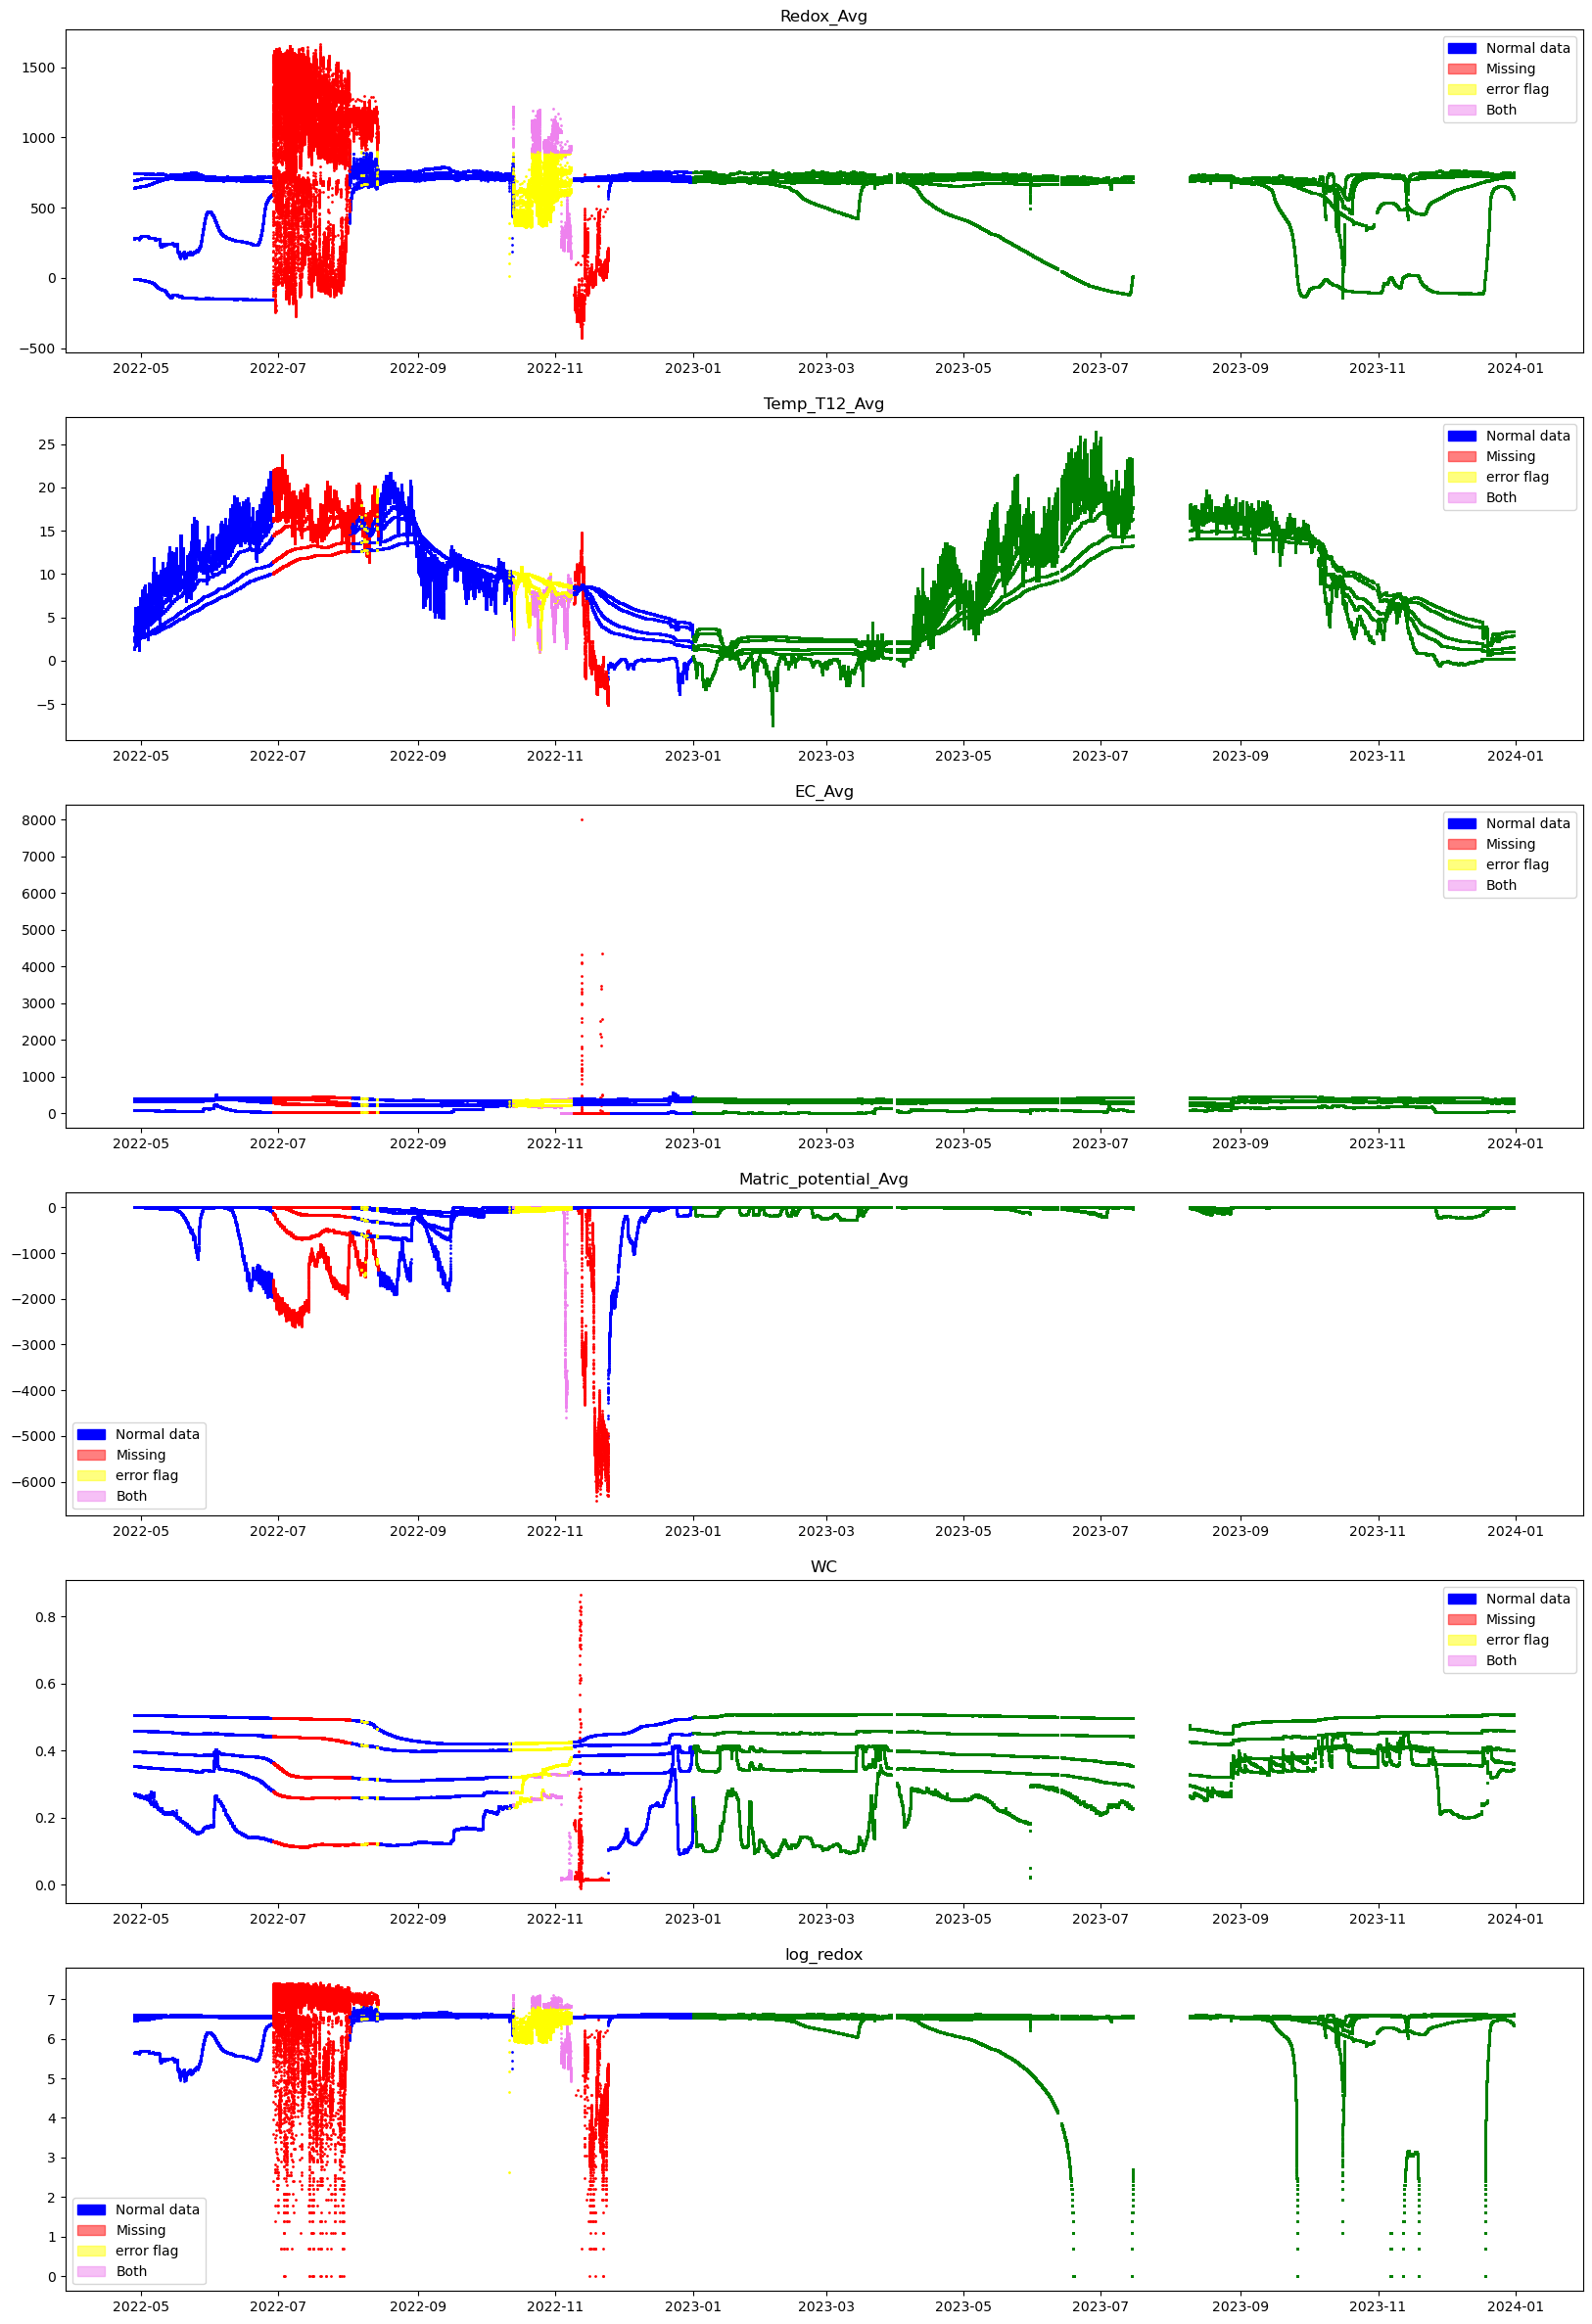

----------------------------------------------------------------------------------------graphs of the variables for the pit # 3 -----------------------------------------------------------------------------------------------


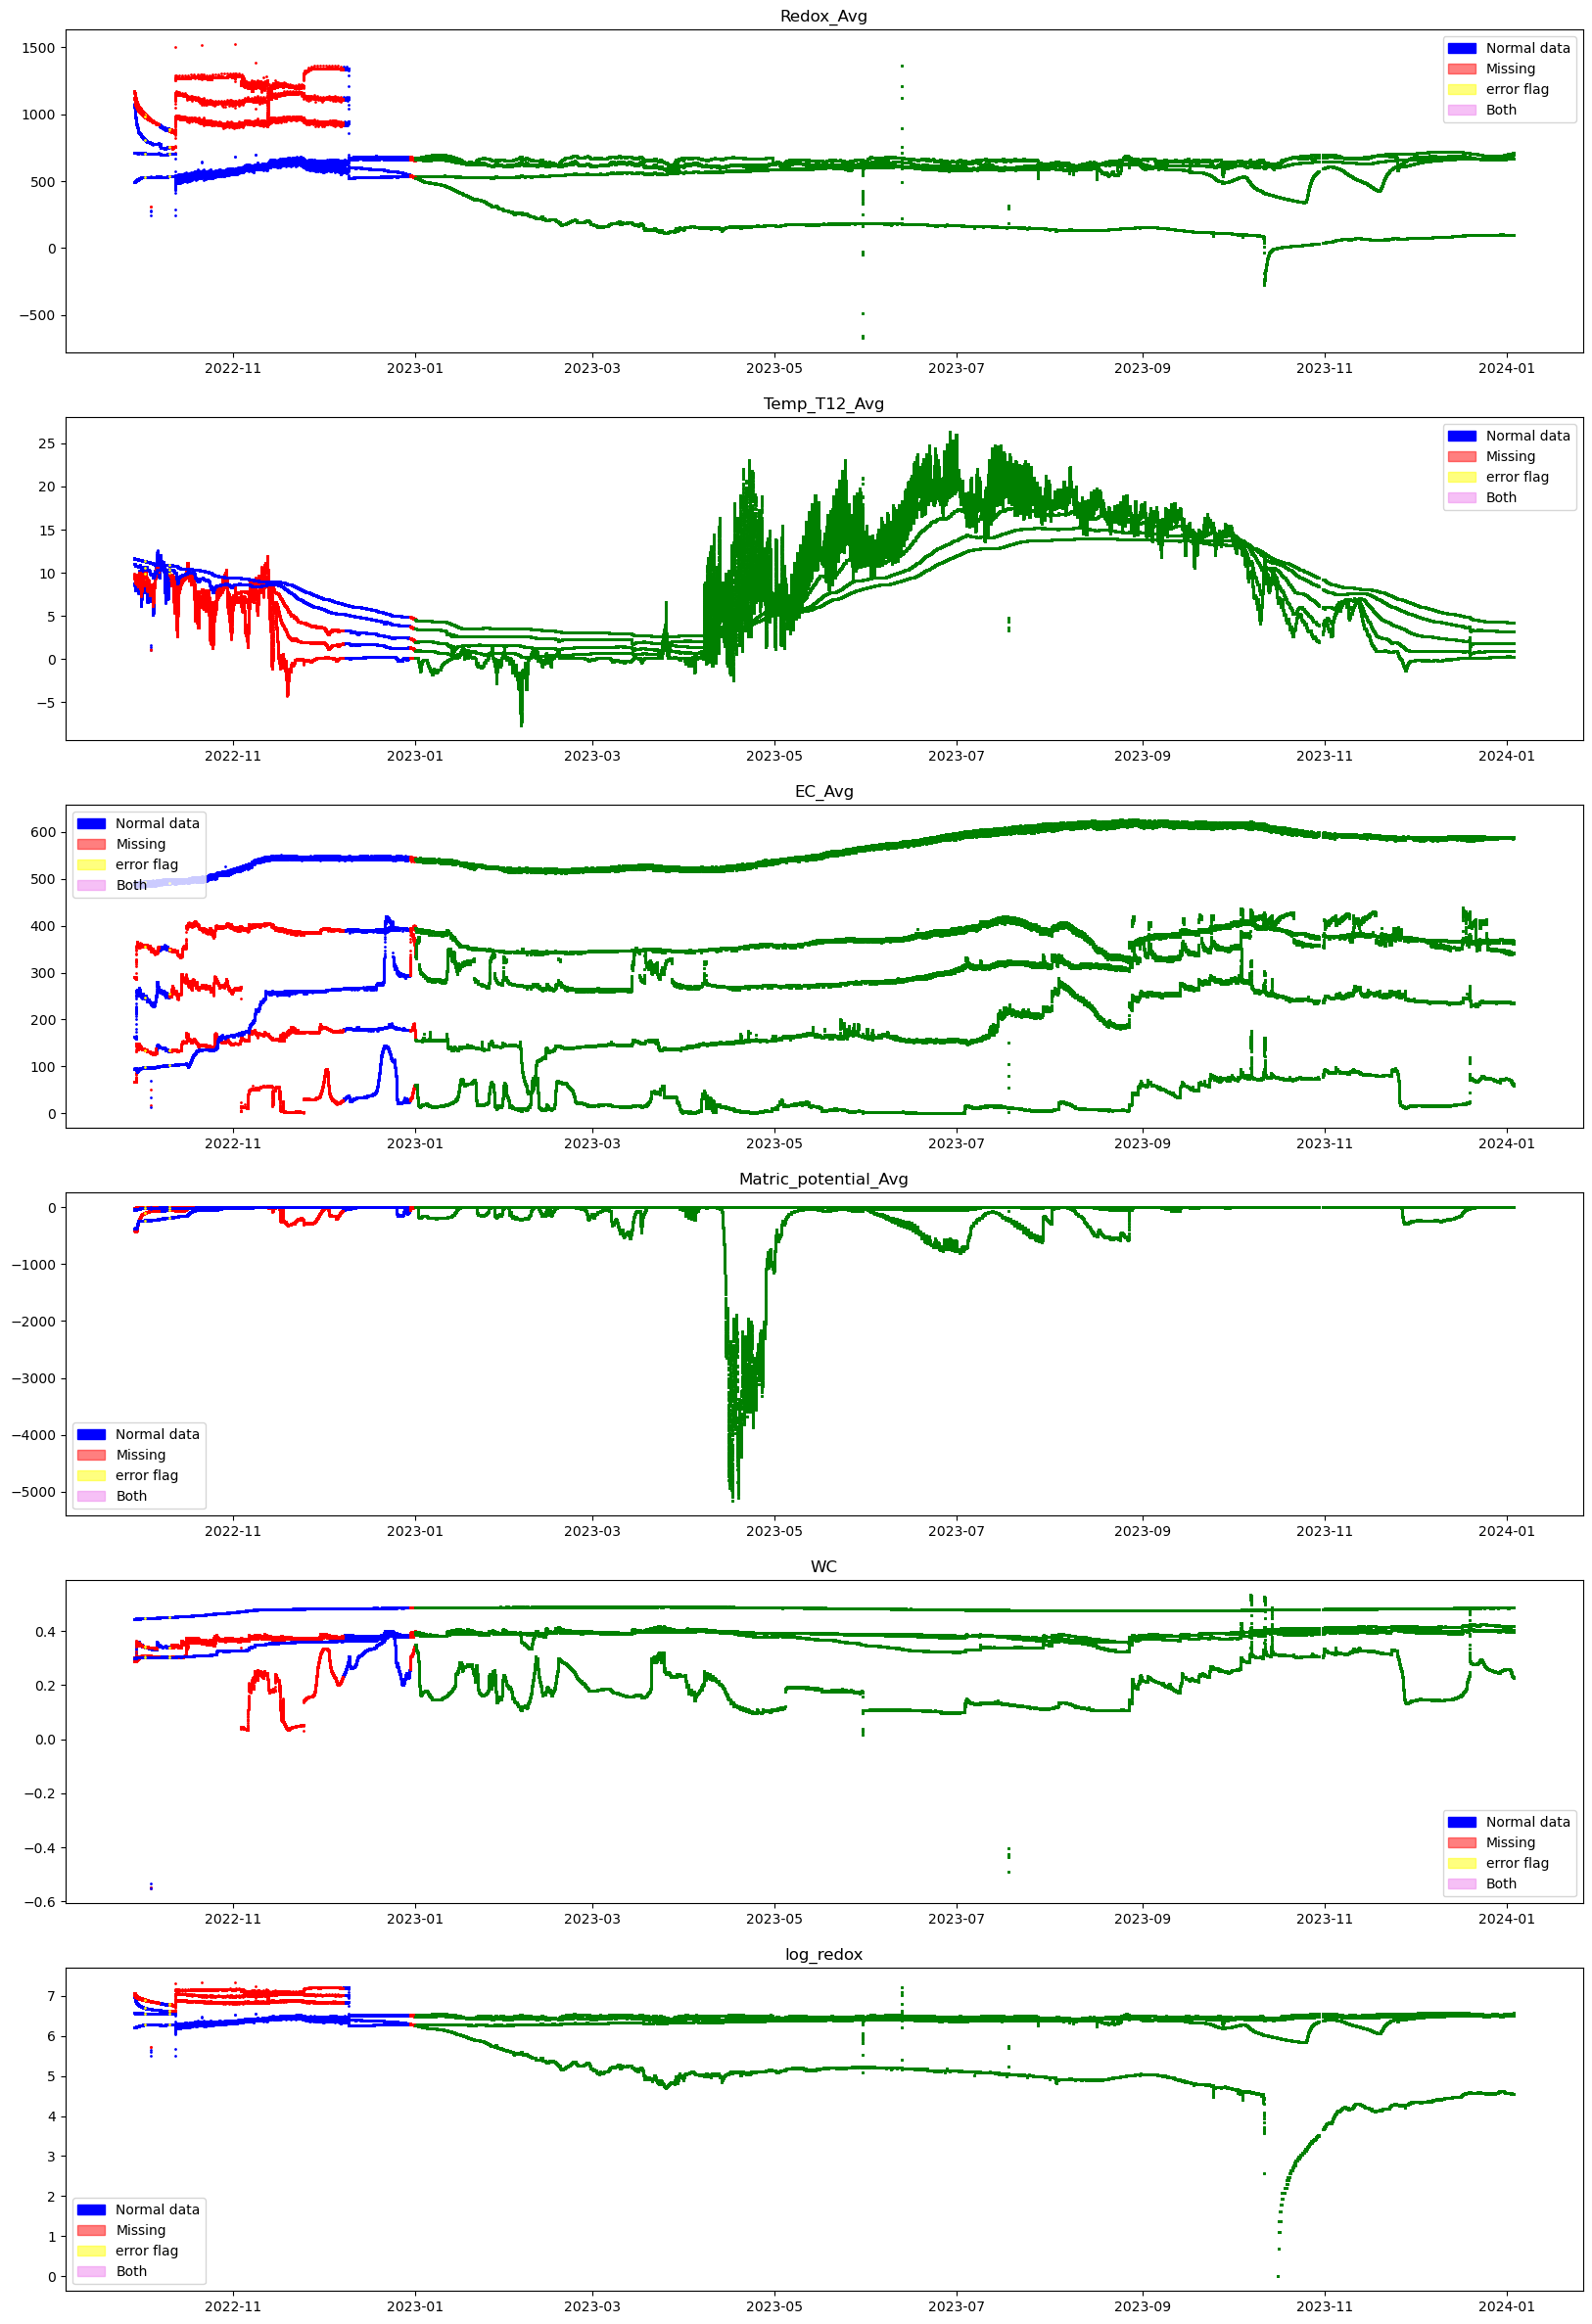

----------------------------------------------------------------------------------------graphs of the variables for the pit # 4 -----------------------------------------------------------------------------------------------


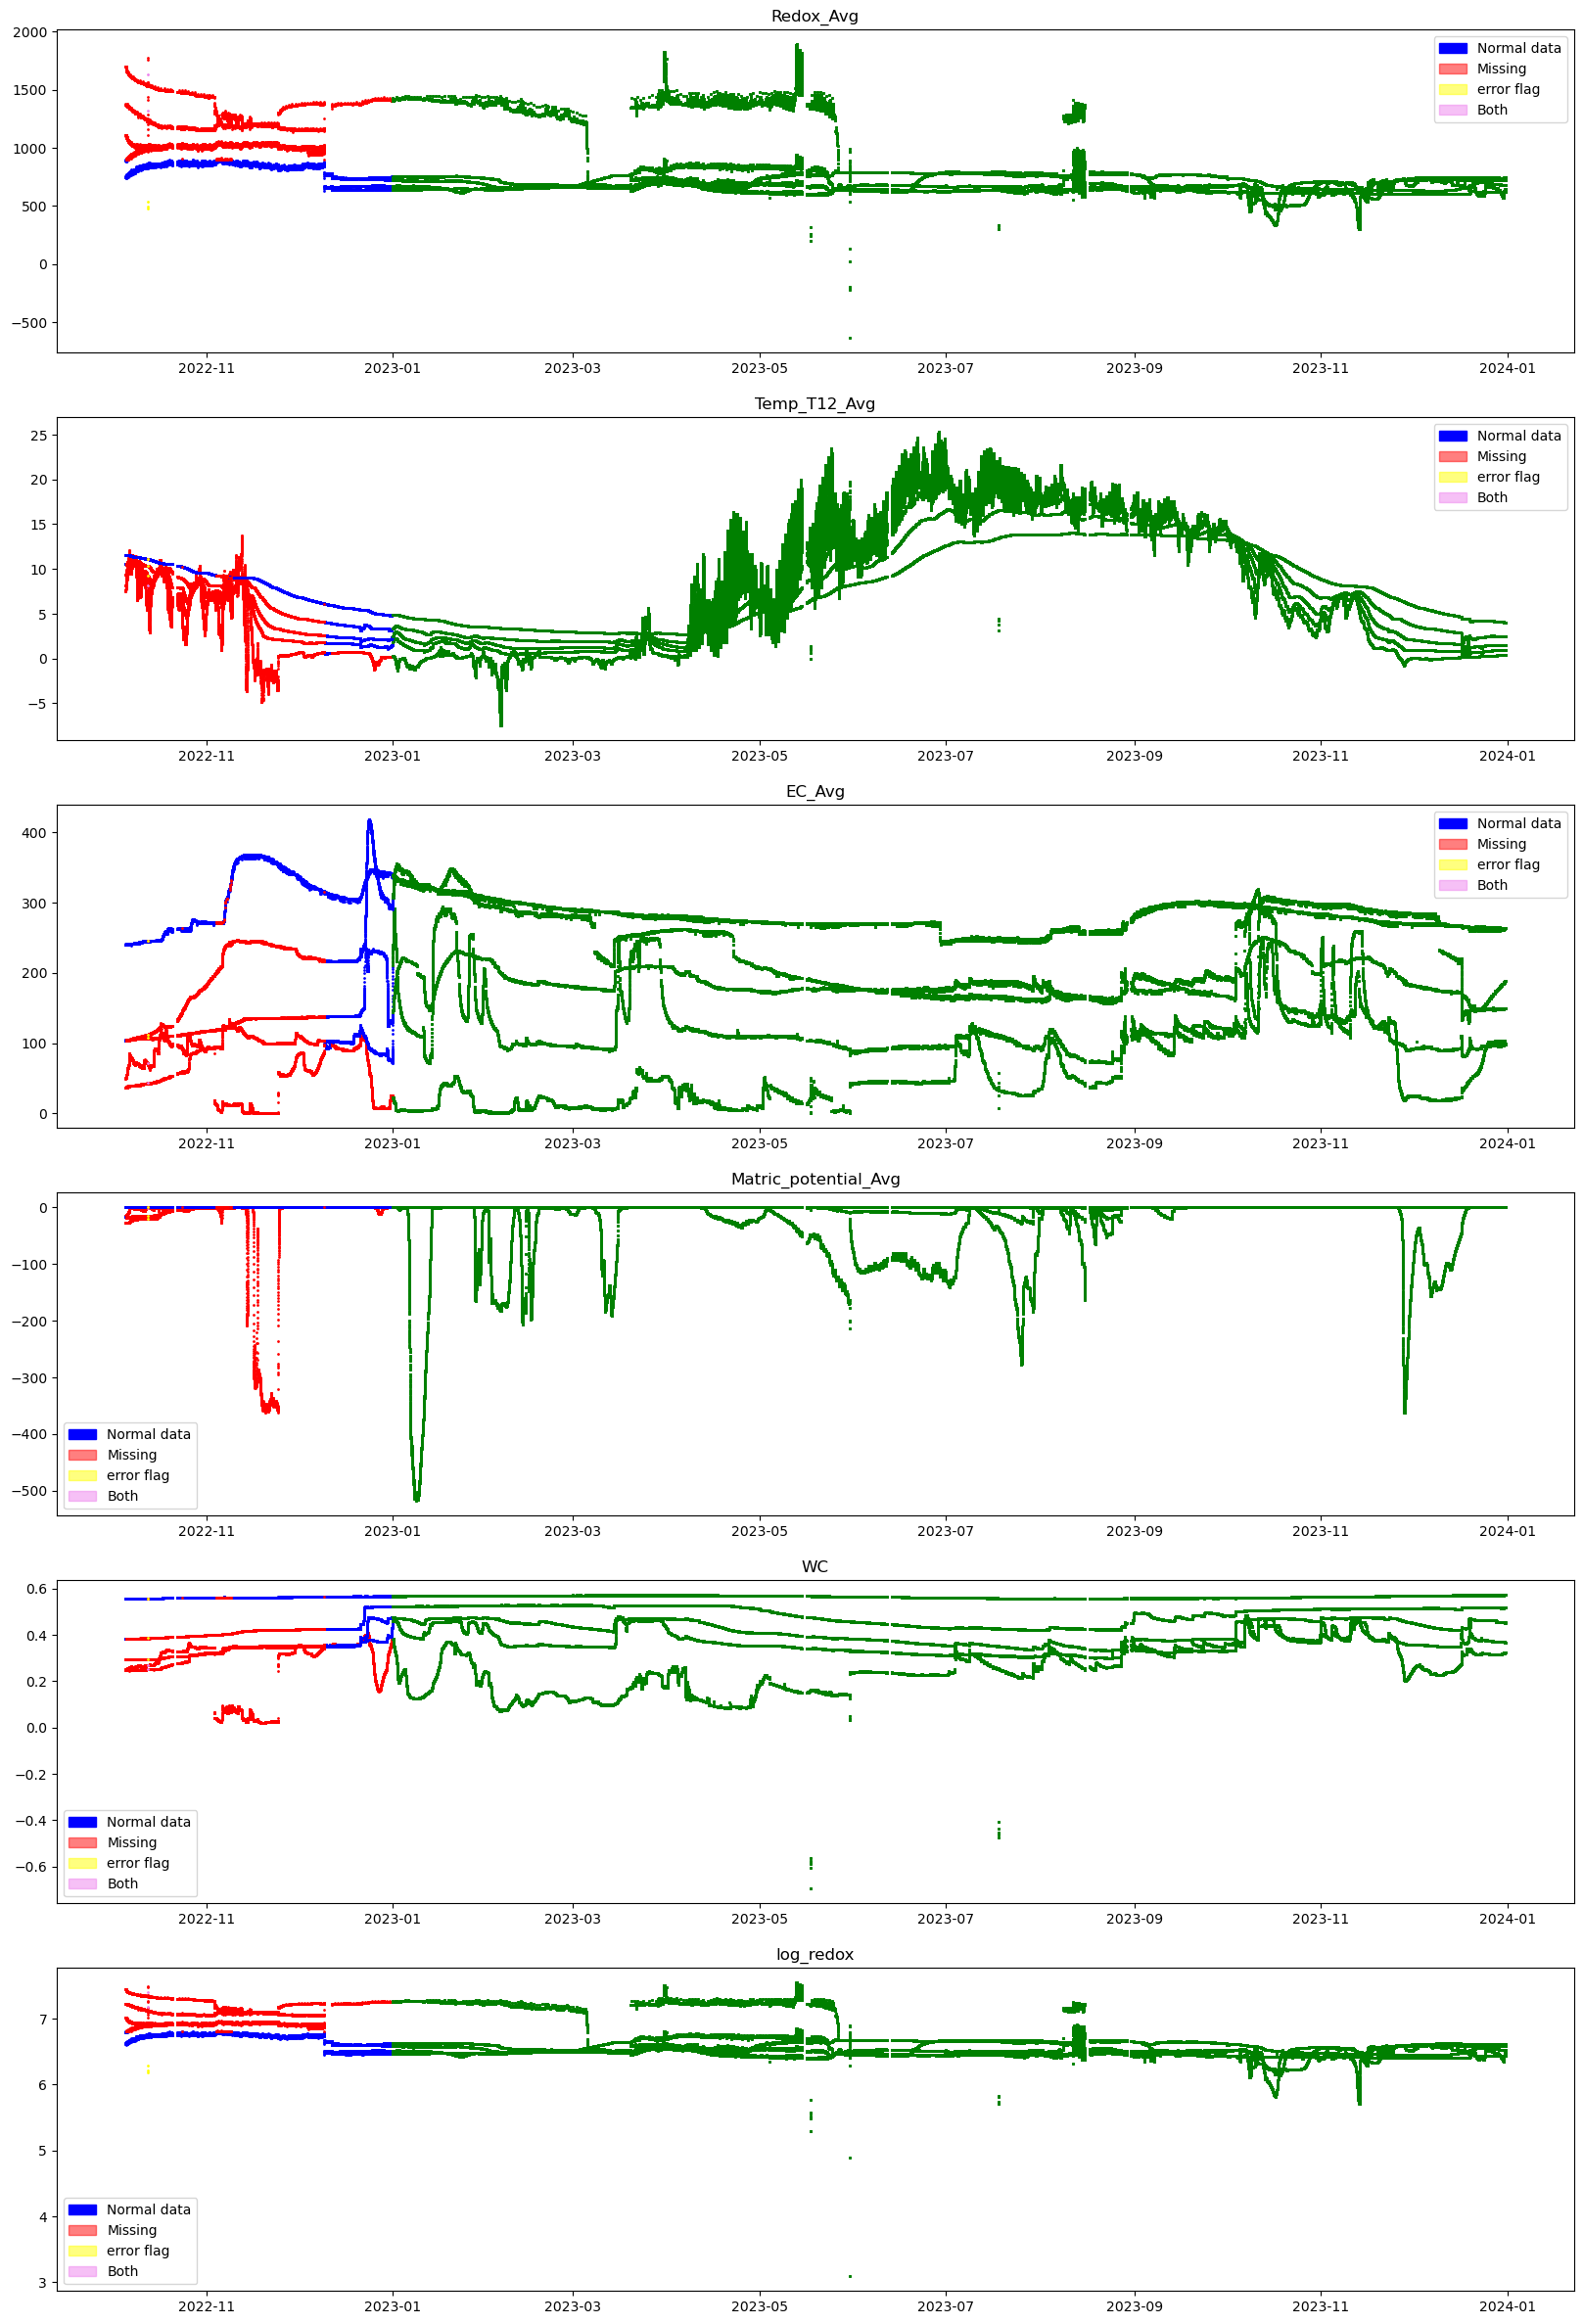

In [90]:
plt.subplots_adjust(hspace = 2.0) 

from matplotlib import patches as patches

colors = {0: "blue", 1: "red", 2: "yellow", 3: "violet"}
labels = {0: "normal", 1: "missing", 2: "error_flag", 3: "both"}

blue_patch = patches.Patch(color='blue', label= 'Normal data')
red_patch = patches.Patch(color = "red", alpha = 0.5, label = "Missing")
yellow_patch = patches.Patch(color = "yellow", alpha = 0.5, label = "error flag")
violet_patch = patches.Patch(color = "violet", alpha = 0.5, label = "Both")

for pit in np.arange(1,5):
    
    print(f"=============================================================================================================================================================================================================================")
    print(f"----------------------------------------------------------------------------------------graphs of the variables for the pit # {pit} -----------------------------------------------------------------------------------------------")
    
    df1_pit = df1.loc[df["pit_number"] == pit, :]
    df2_pit = df2.loc[df["pit_number"] == pit, :]
    
    features = list()
    
    for error_flag_feature in ['Redox_error_flag(1)', 'Redox_error_flag(2)', 'Redox_error_flag(3)', 'Redox_error_flag(4)', 'Redox_error_flag(5)']:
        
        level_specific, j = sensor_specific_features(error_flag_feature)
        level_specific_map = [(x, error_flag_feature) for x in level_specific]
        
        features.append(level_specific_map)
    
    features_zip = zip(*features)
    
    fig, axes = plt.subplots(nrows = len(level_specific_map), ncols = 1, figsize = (20,30))
    
    for i, sensor_feature_all_depths in enumerate(features_zip):
        for (depth_feature, error_feature) in sensor_feature_all_depths:
            c = df1_pit[[error_feature]+['Redox_error_flag']].apply(error_source, axis = 1)
            for type in np.arange(4):
                axes[i].scatter(df1_pit.loc[c == type, ["TIMESTAMP"]], df1_pit.loc[c == type, [depth_feature]], c = colors[type], s = 1)
                axes[i].scatter(df2_pit["TIMESTAMP"], df2_pit[depth_feature], c = "green", s = 1)     
        axes[i].legend(handles = [blue_patch, red_patch, yellow_patch, violet_patch])
        
        if re.search("\(5\)",depth_feature) != None:
            feature_name = depth_feature[0:re.search("\(5\)",depth_feature).start()]
        else:
            feature_name = depth_feature[0:re.search("5",depth_feature).start()]
        
        axes[i].set_title(f"{feature_name}")  
        
    plt.show()

### Distributions of variables conditioned on the error flag (!!! only for pit1 - can change in the first 2 lines of the next cell)

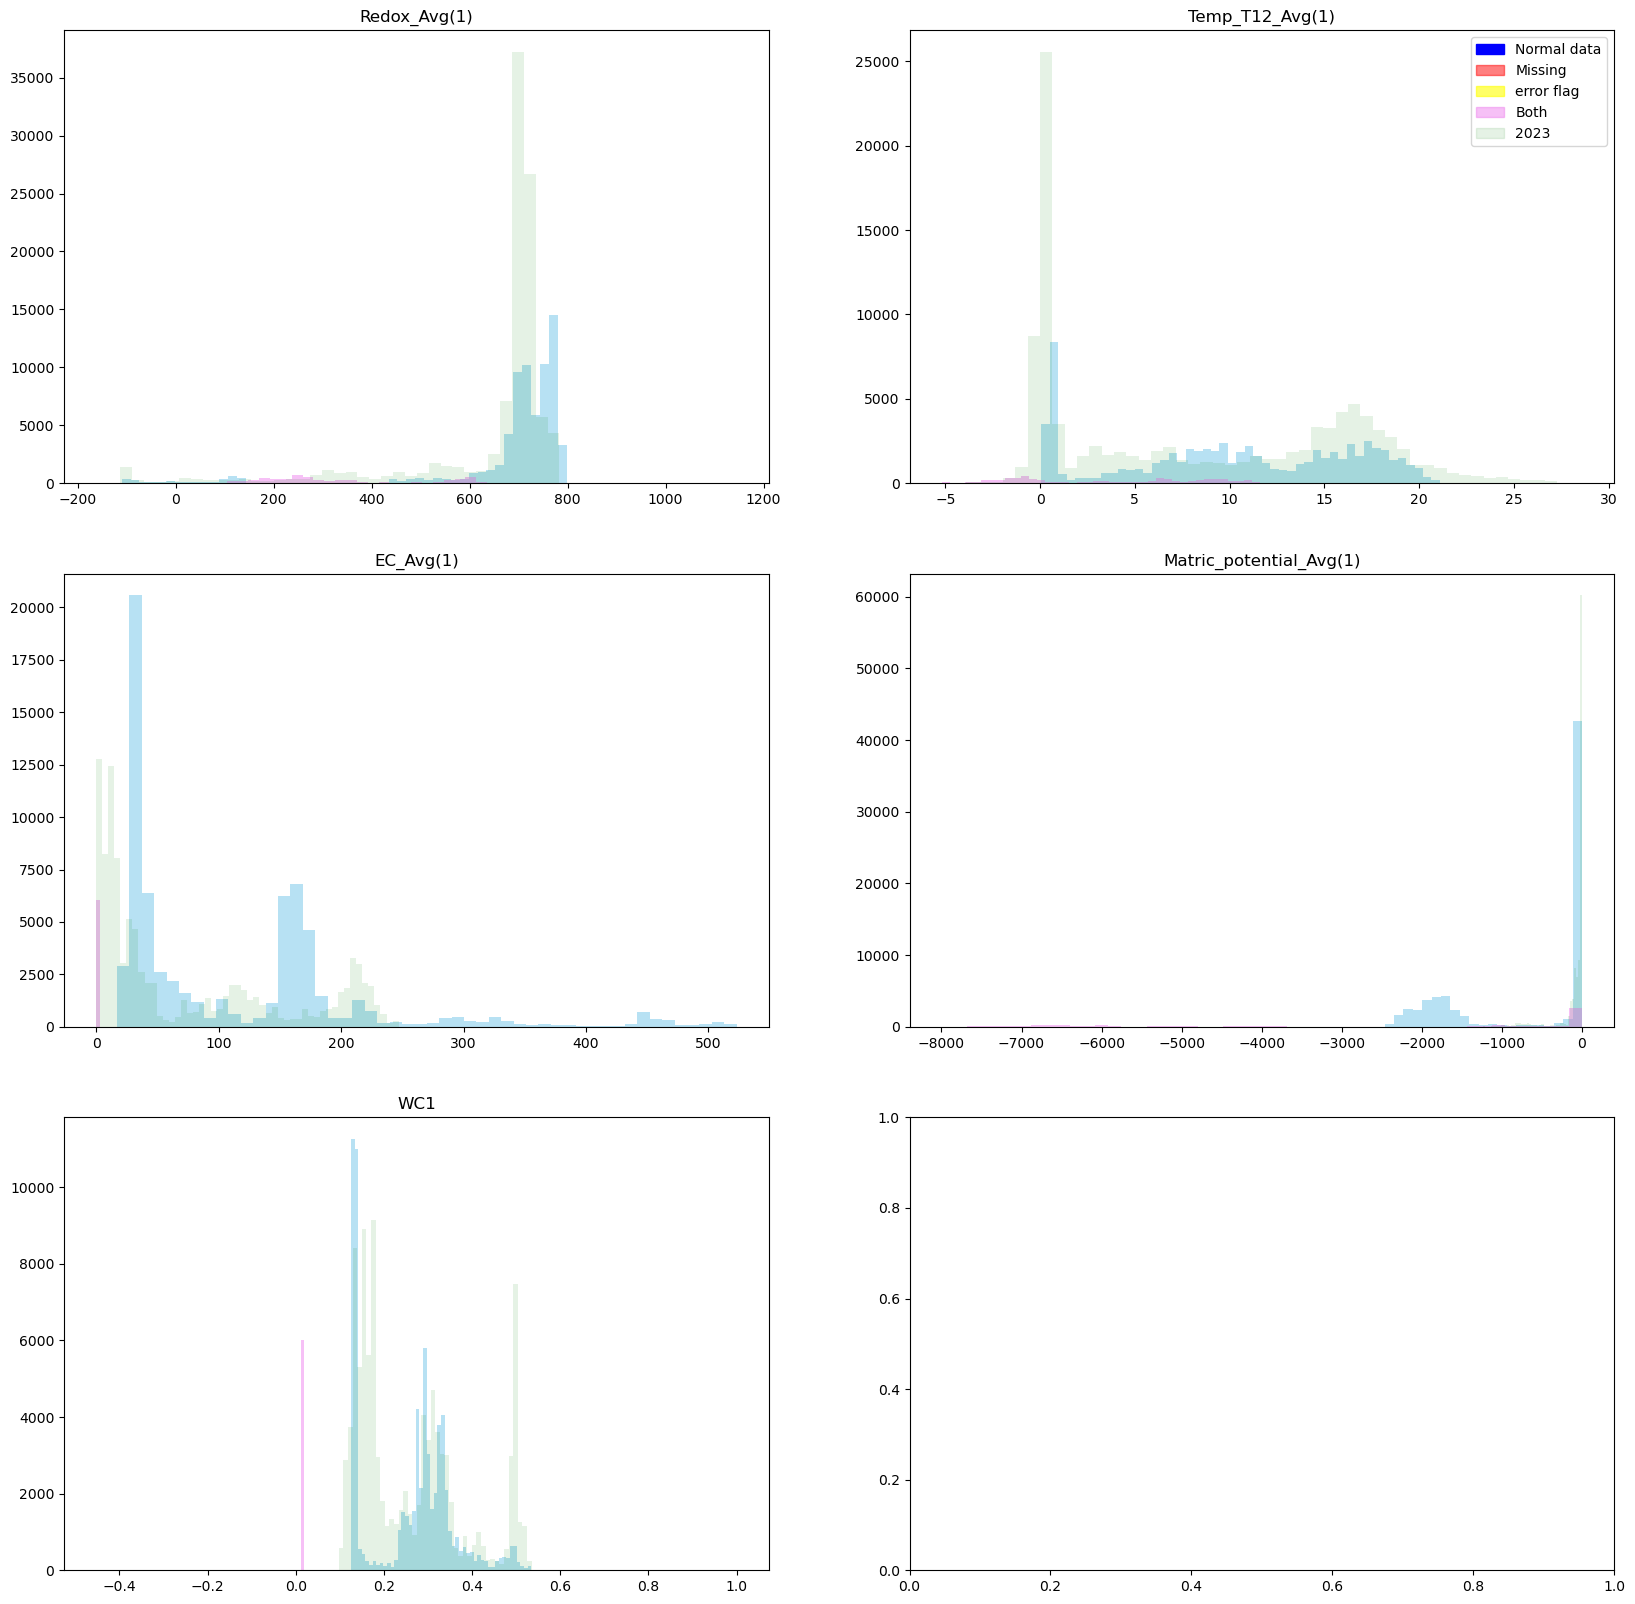

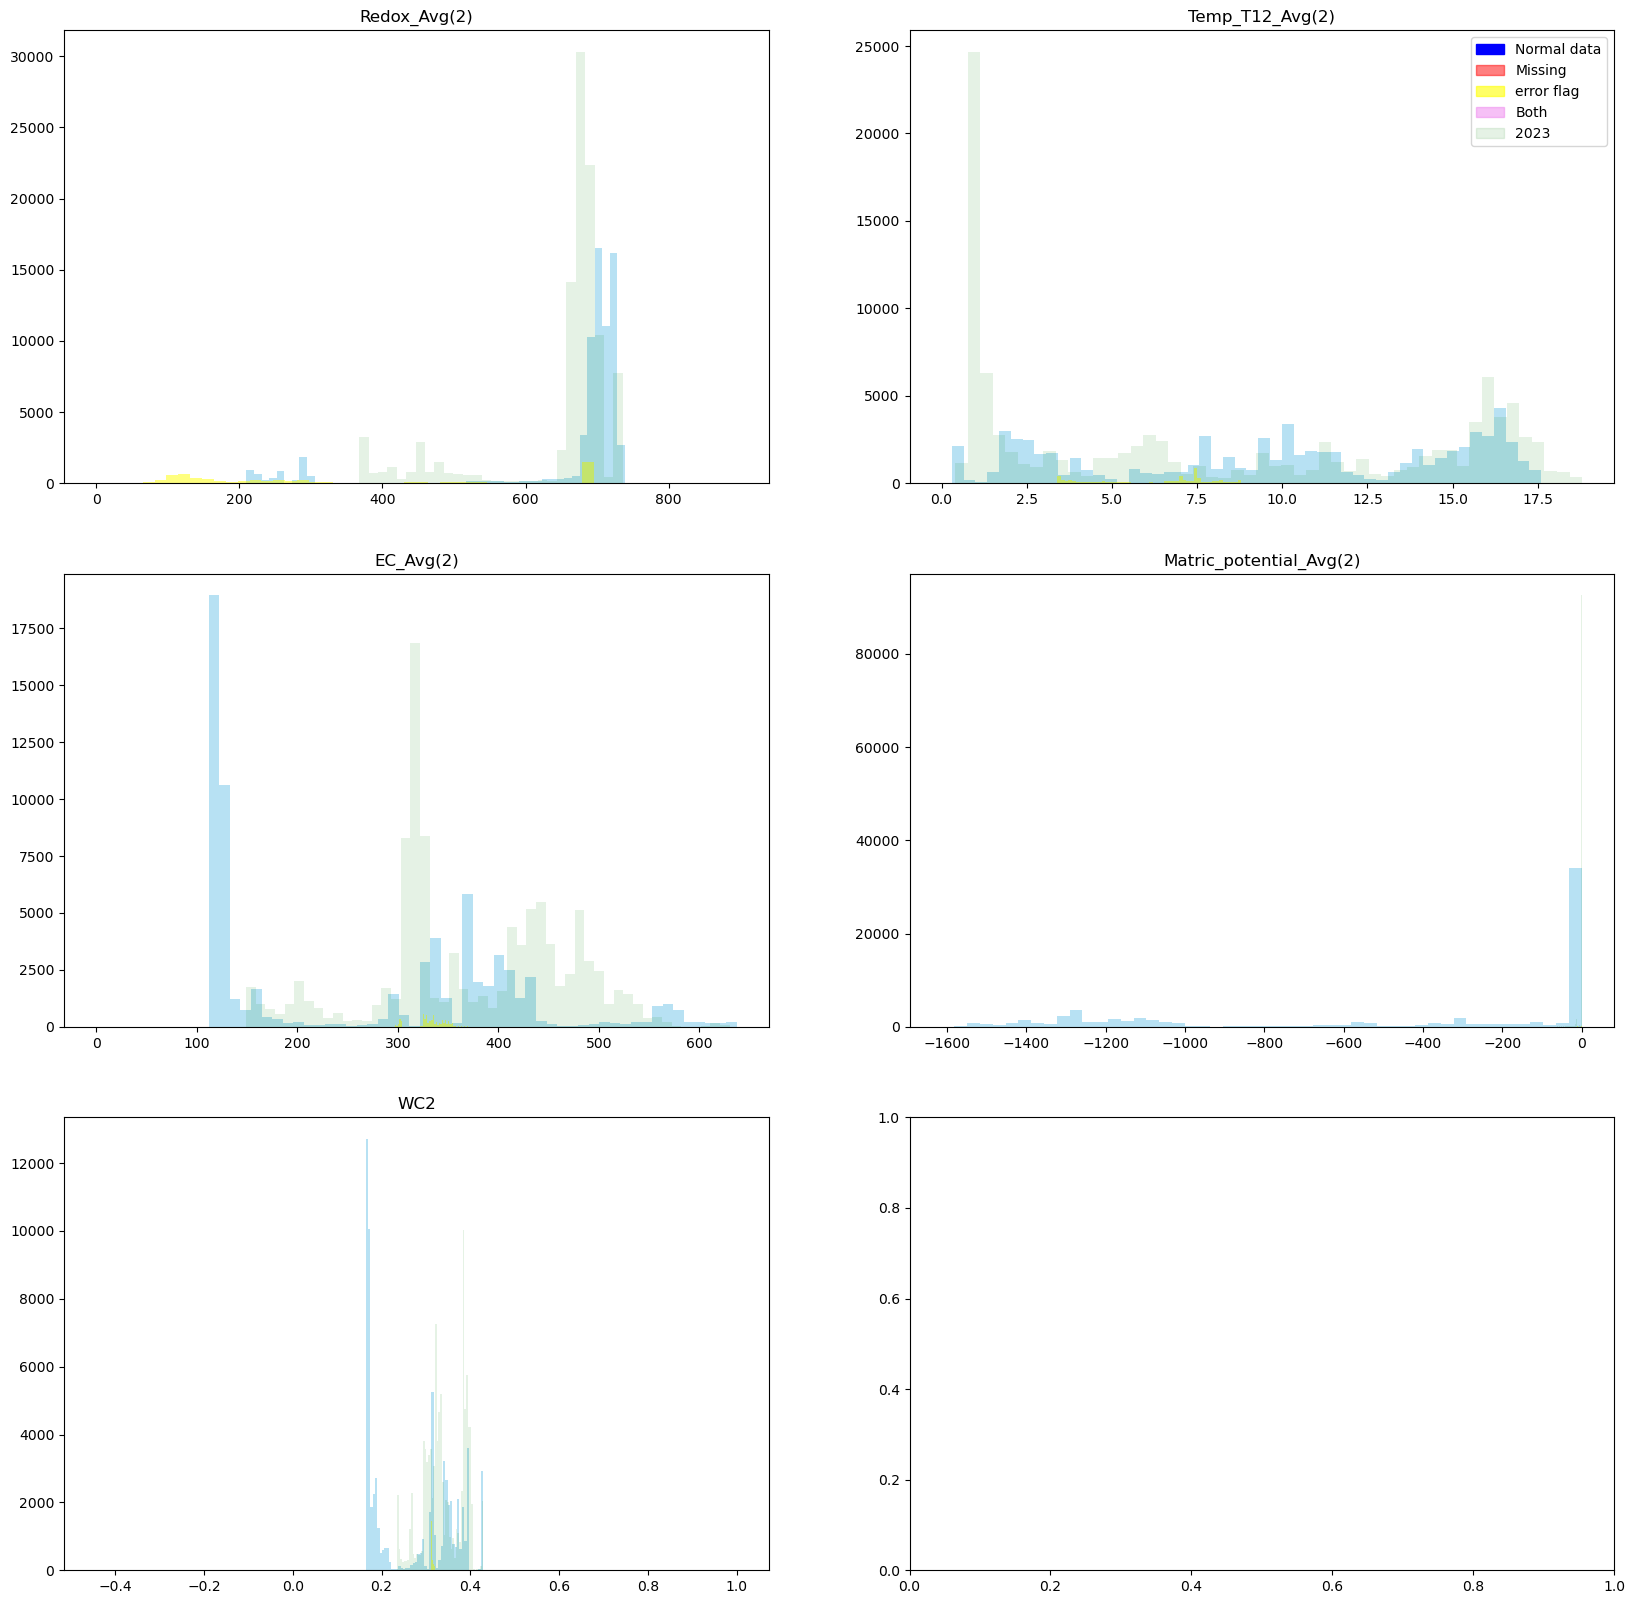

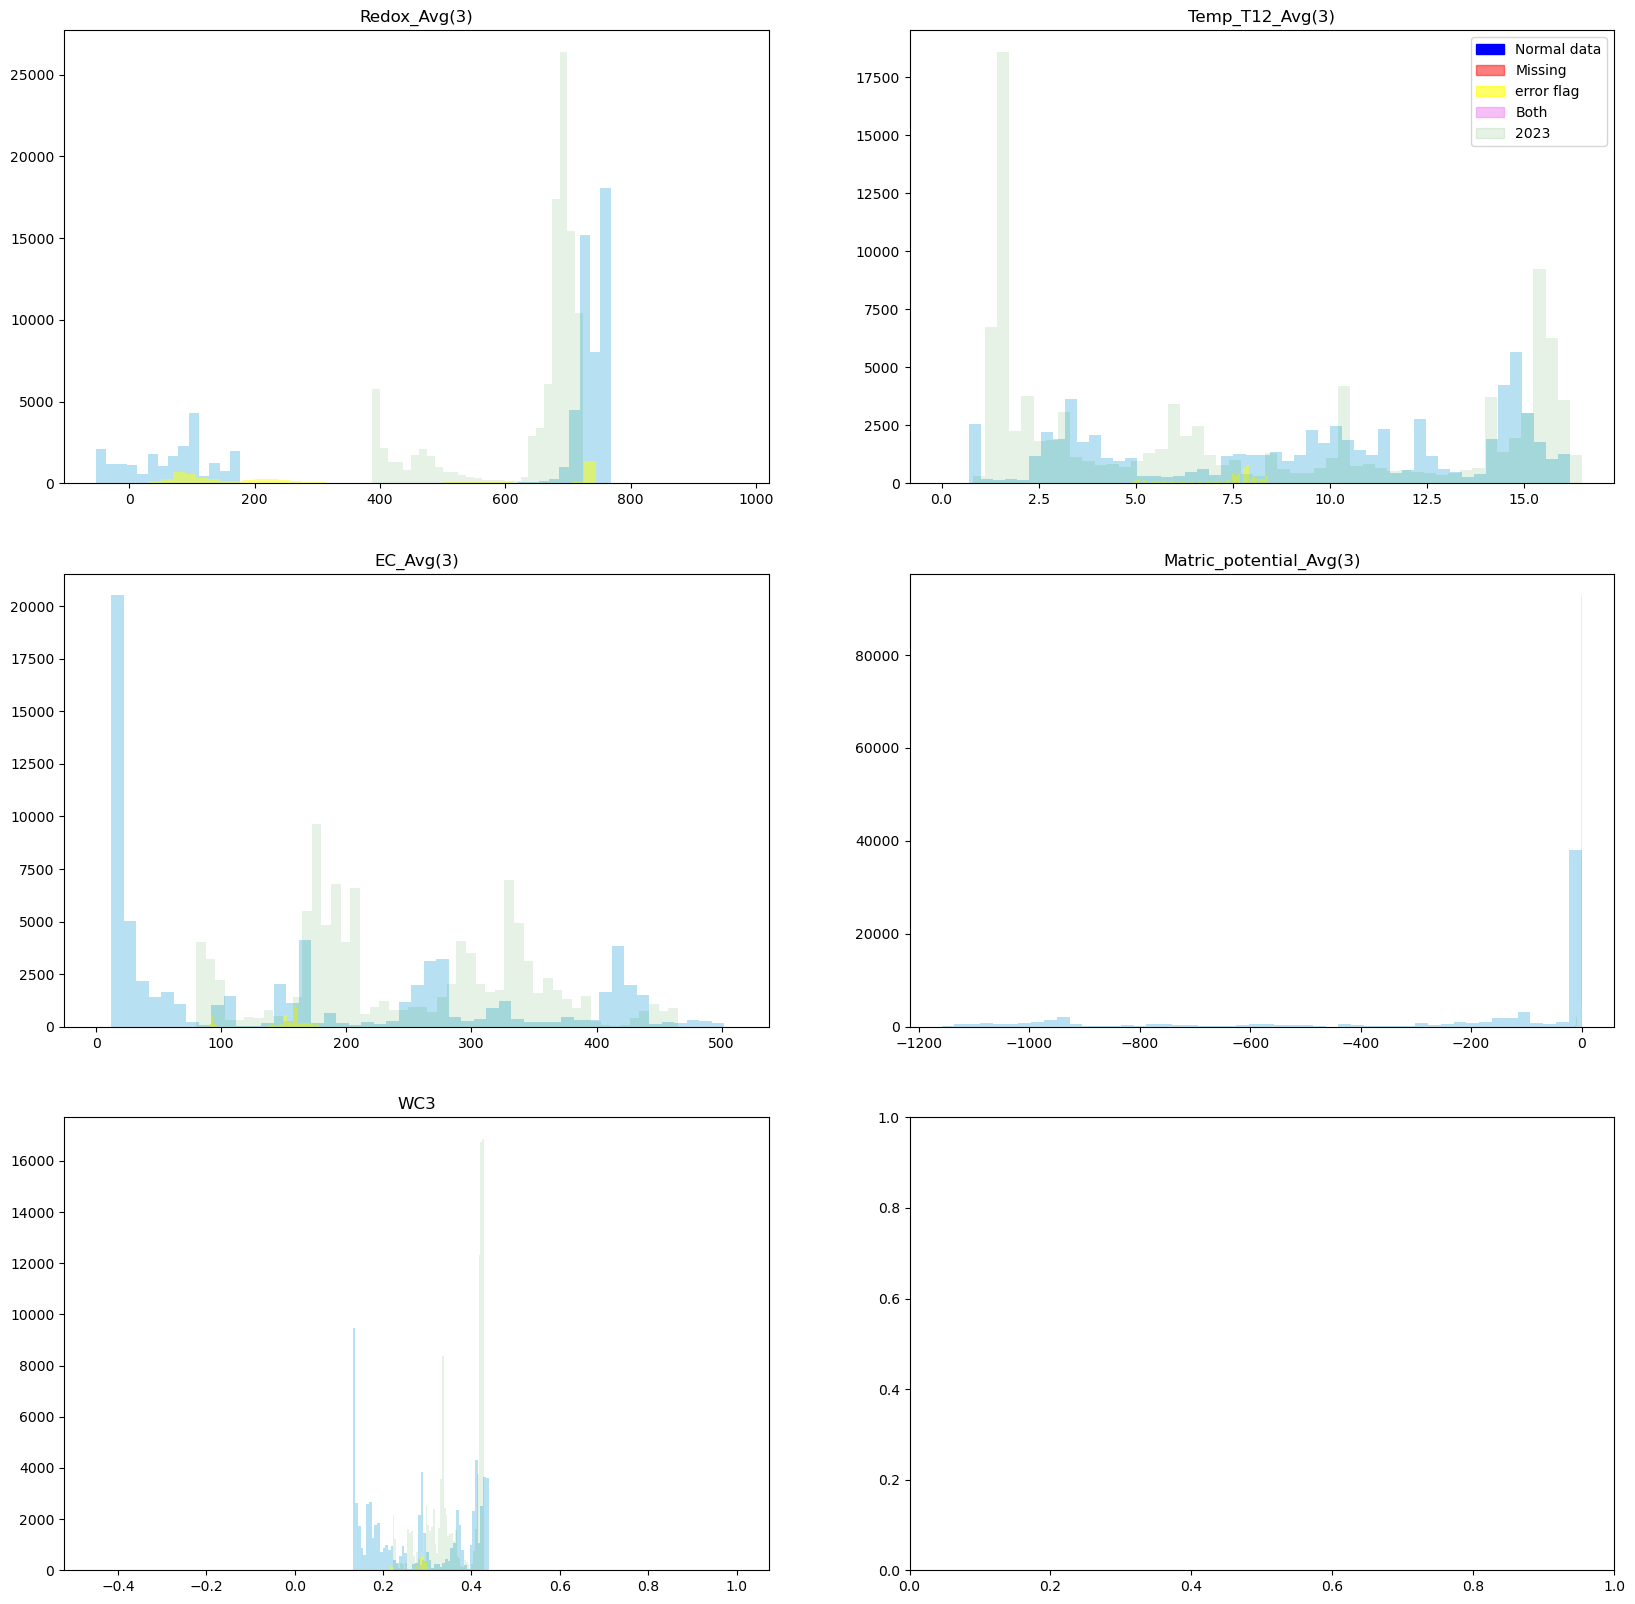

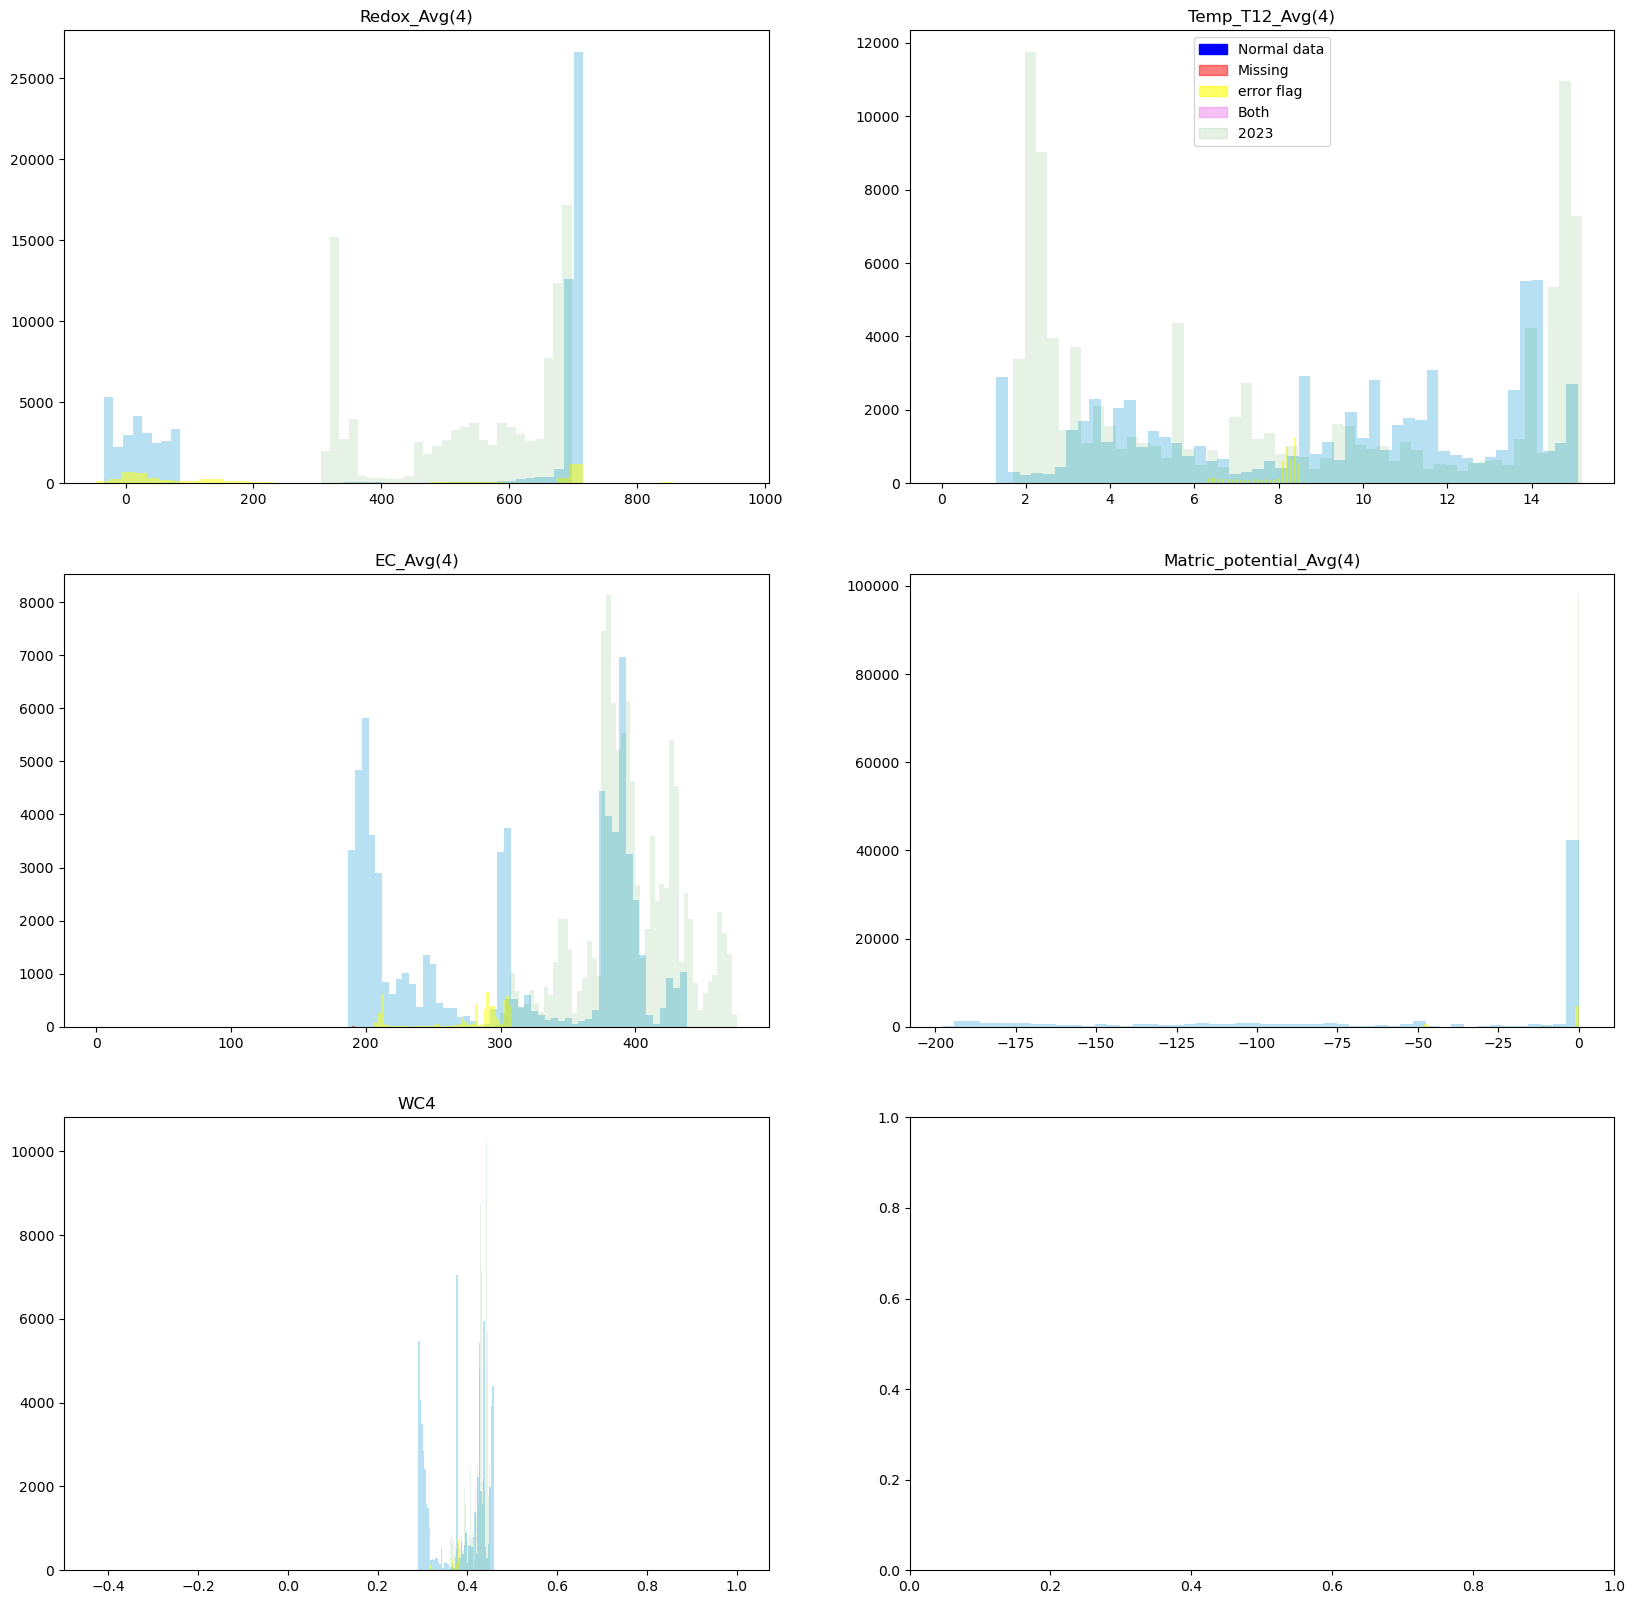

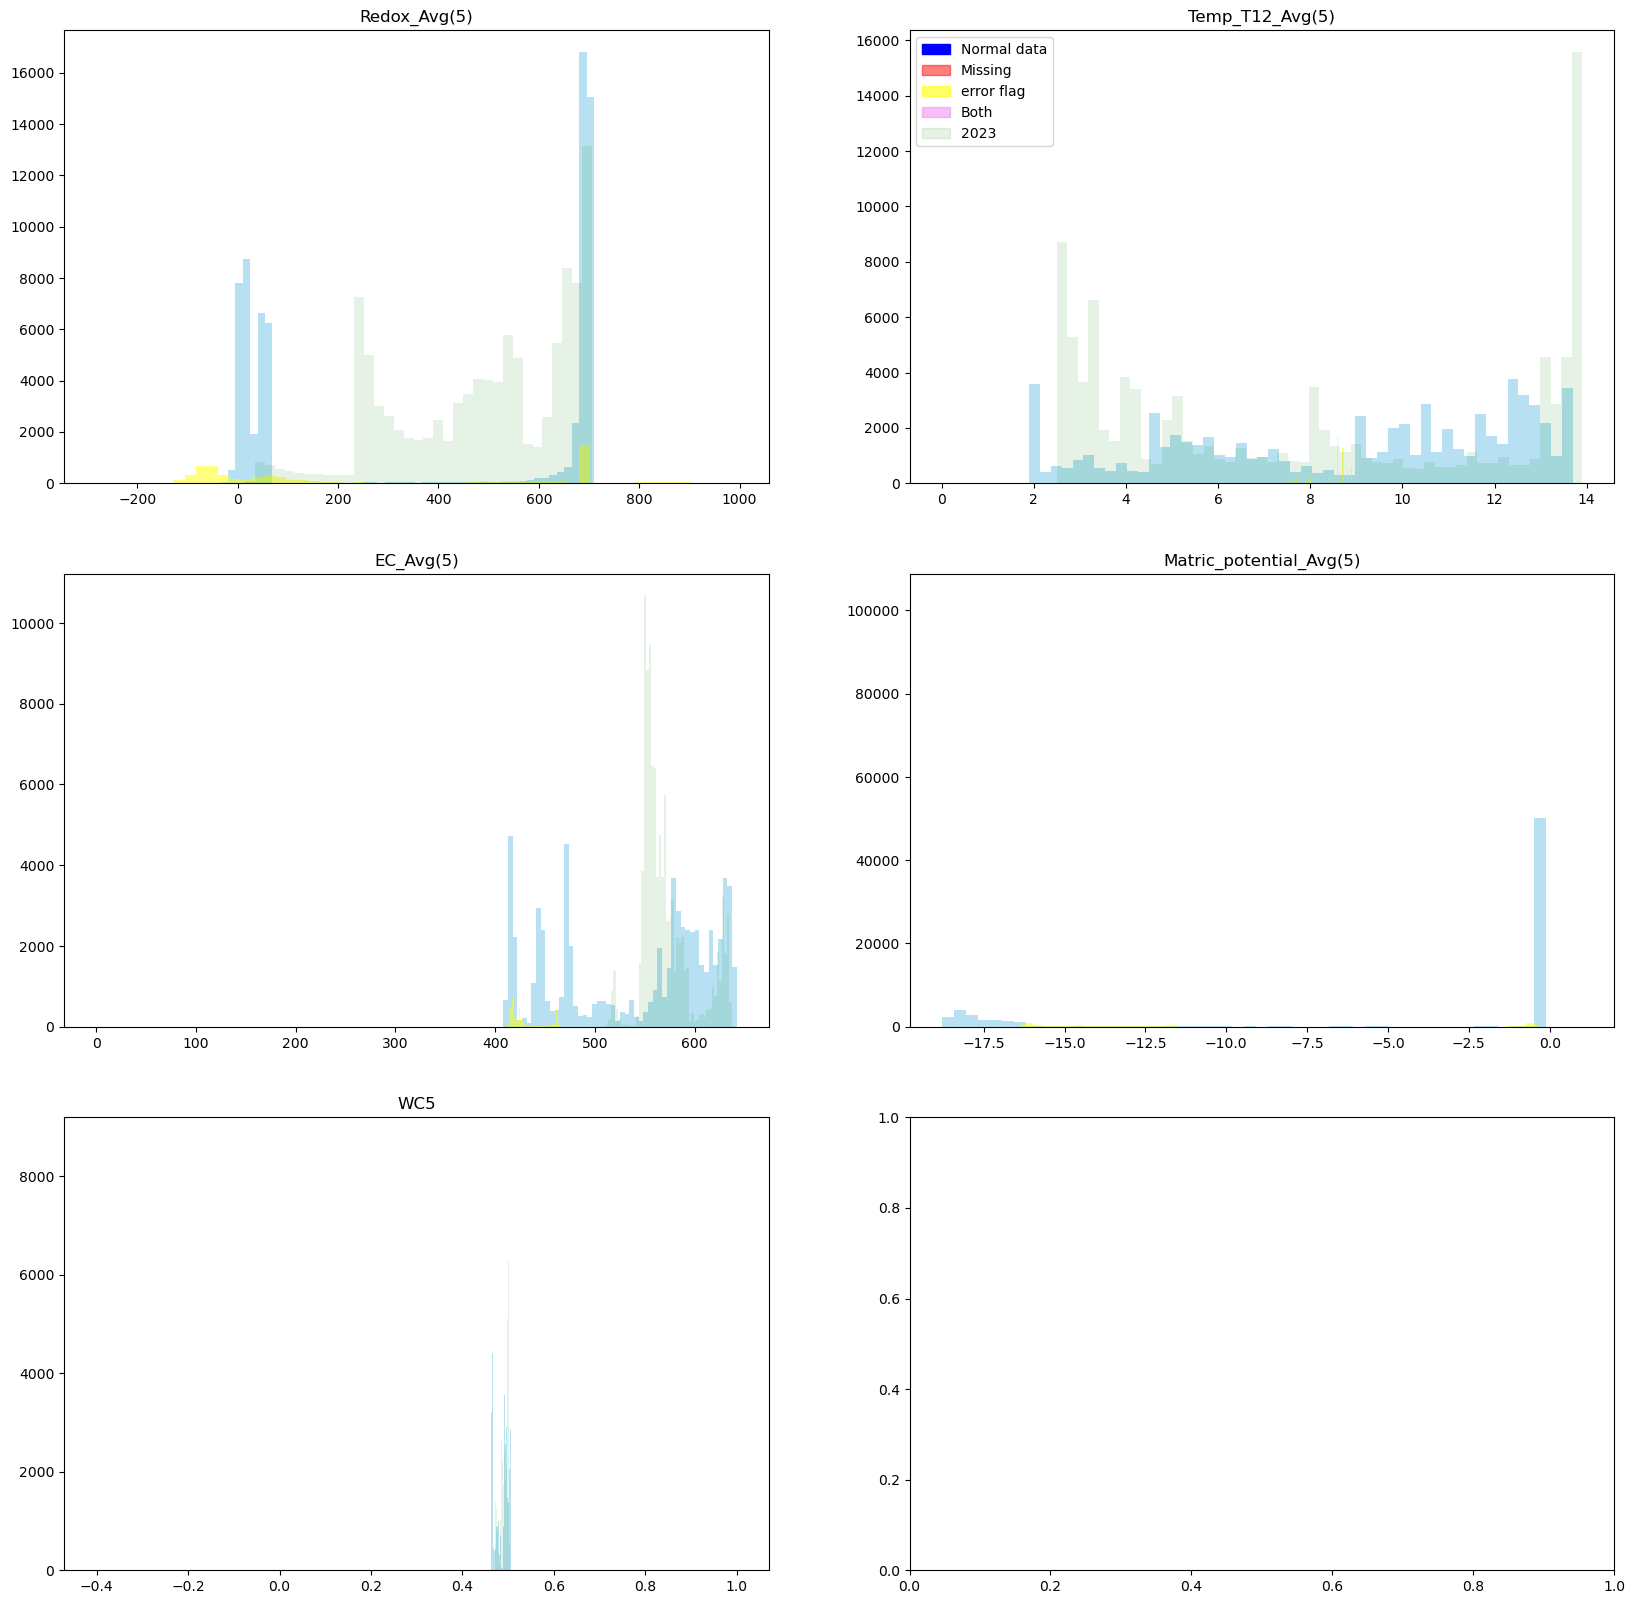

In [100]:
df22_pit1 = df1.loc[df1["pit_number"] == 1, :].drop(["log_redox(1)", "log_redox(2)", "log_redox(3)", "log_redox(4)",
       "log_redox(5)"], axis = 1)
df23_pit1 = df2.loc[df2["pit_number"] == 1, :].drop(["log_redox(1)", "log_redox(2)", "log_redox(3)", "log_redox(4)",
       "log_redox(5)"], axis = 1)

for error_flag_feature in ['Redox_error_flag(1)', 'Redox_error_flag(2)', 'Redox_error_flag(3)', 'Redox_error_flag(4)', 'Redox_error_flag(5)']:
        
        level_specific, j = sensor_specific_features(error_flag_feature)
        level_specific = [feature_name for feature_name in level_specific if (feature_name != "log_redox(" + str(j) + ")")]

        blue_patch = patches.Patch(color='blue', label= 'Normal data')
        red_patch = patches.Patch(color = "red", alpha = 0.5, label = "Missing")
        yellow_patch = patches.Patch(color = "yellow", alpha = 0.6, label = "error flag")
        violet_patch = patches.Patch(color = "violet", alpha = 0.5, label = "Both")  
        green_patch = patches.Patch(color = "green", alpha = 0.1, label = "2023")          
        
        n = len(level_specific)
        
        c = df22_pit1[[error_flag_feature]+['Redox_error_flag']].apply(error_source, axis = 1)
        
        fig, axes = plt.subplots(nrows = int(np.ceil(n / 2)), ncols = 2, sharex = False, sharey = False, figsize = (20,20))
        
        for i, sensor_feature in enumerate(level_specific):
            
            axes[int(i/2), i%2].hist(df22_pit1[c == 0][sensor_feature], color = "skyblue", alpha = 0.6, bins = 50)
            axes[int(i/2), i%2].hist(df22_pit1[c == 1][sensor_feature], color = "red", alpha = 0.5, bins = 50)
            axes[int(i/2), i%2].hist(df22_pit1[c == 2][sensor_feature], color = "yellow", alpha = 0.5, bins = 50)
            axes[int(i/2), i%2].hist(df22_pit1[c == 3][sensor_feature], color = "violet", alpha = 0.5, bins = 50)
            axes[int(i/2), i%2].hist(df23_pit1[sensor_feature], color = "green", alpha = 0.1, bins = 50)
            if(i == 1):
                axes[int(i/2), i%2].legend(handles = [blue_patch, red_patch, yellow_patch, violet_patch, green_patch])
            axes[int(i/2), i%2].set_title(sensor_feature)

In [23]:
blue_patch = patches.Patch(color='blue', label= 'Normal data')
red_patch = patches.Patch(color = "red", alpha = 0.5, label = "Missing")
yellow_patch = patches.Patch(color = "yellow", alpha = 0.6, label = "error flag")
violet_patch = patches.Patch(color = "violet", alpha = 0.5, label = "Both")  
green_patch = patches.Patch(color = "green", alpha = 0.1, label = "2023") 

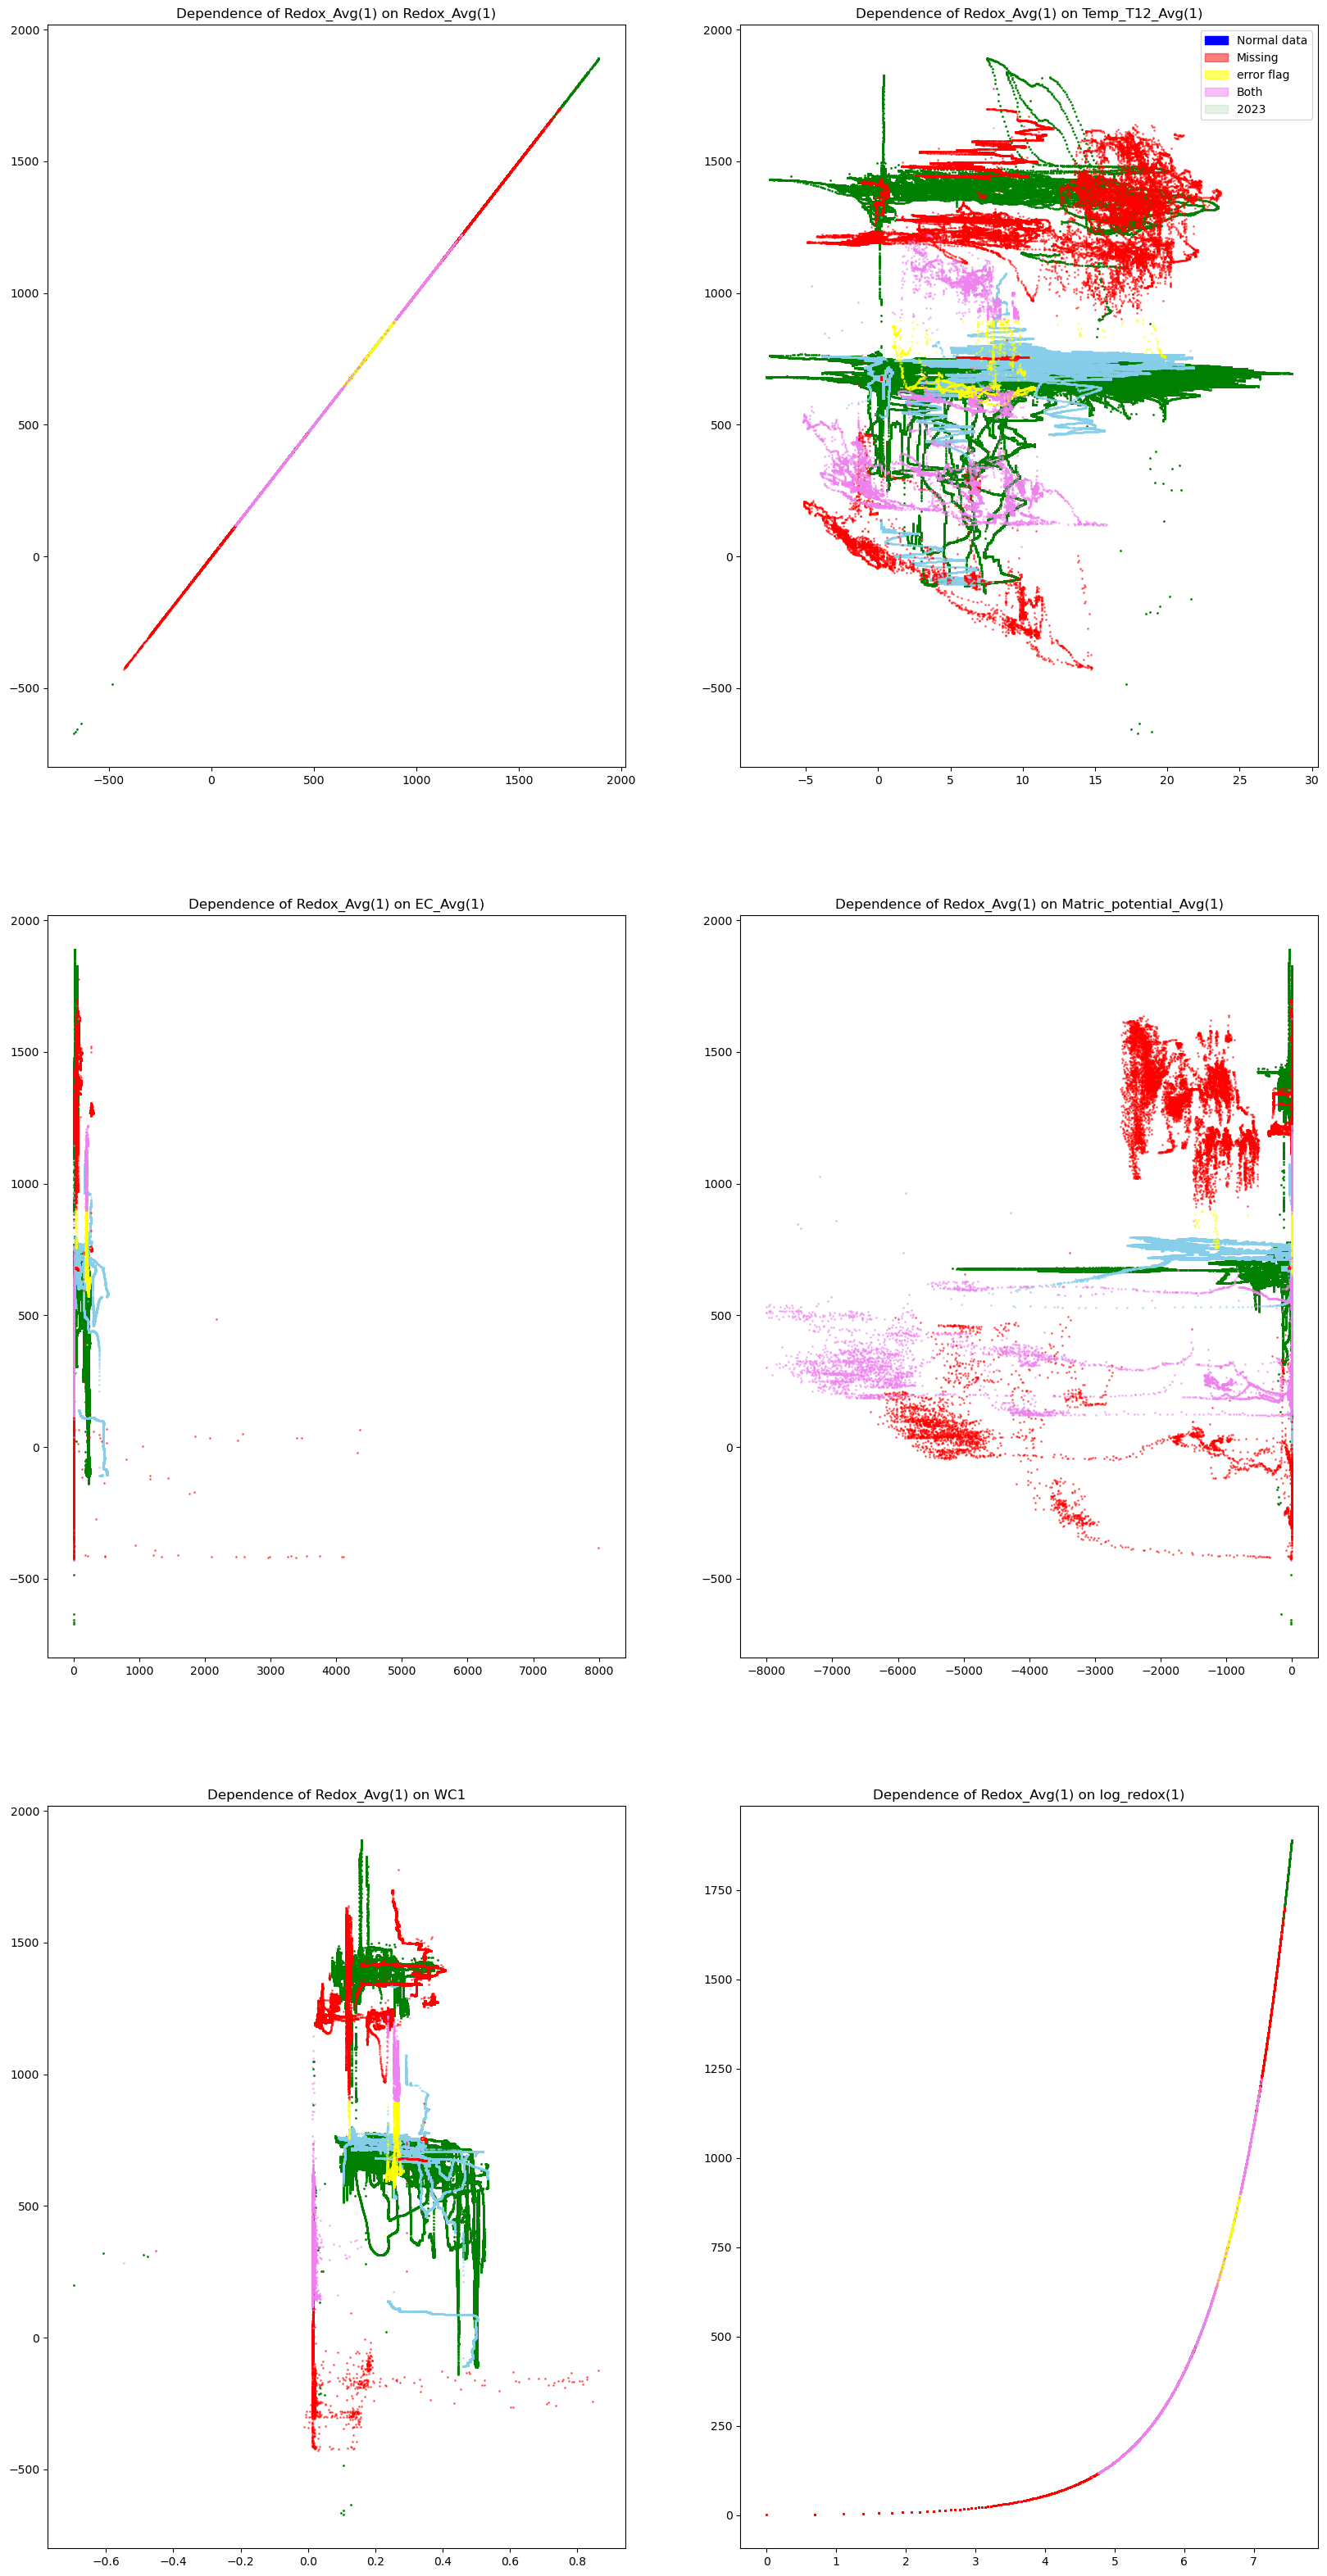

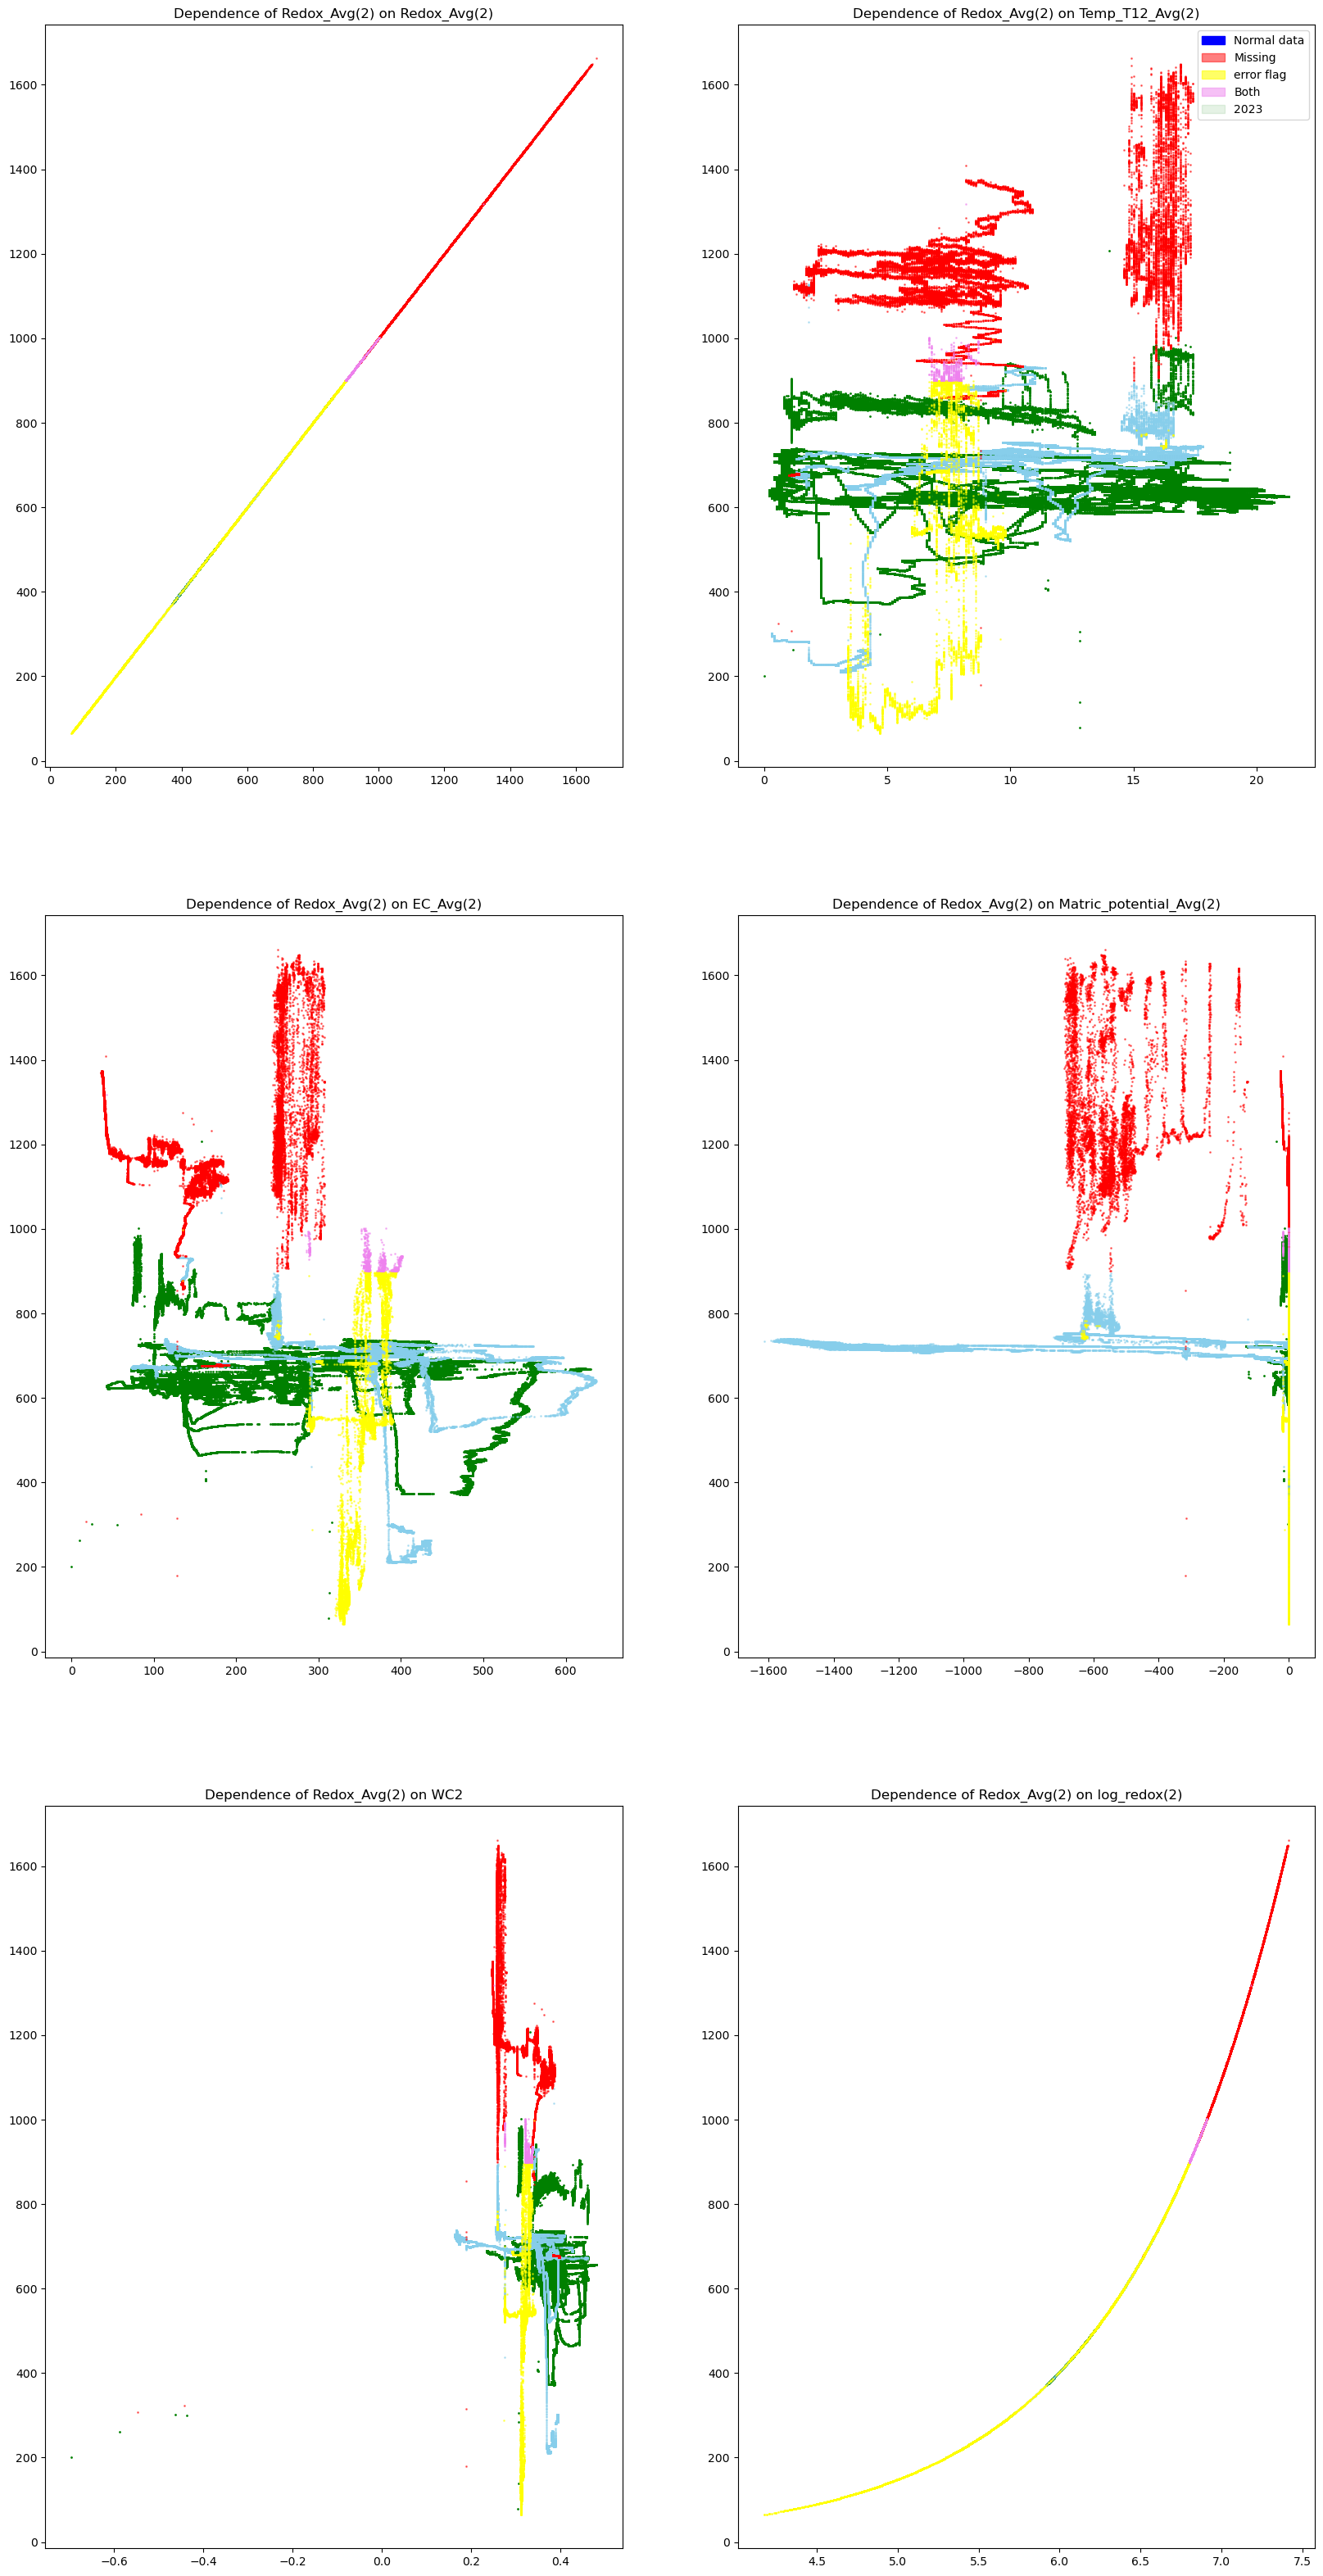

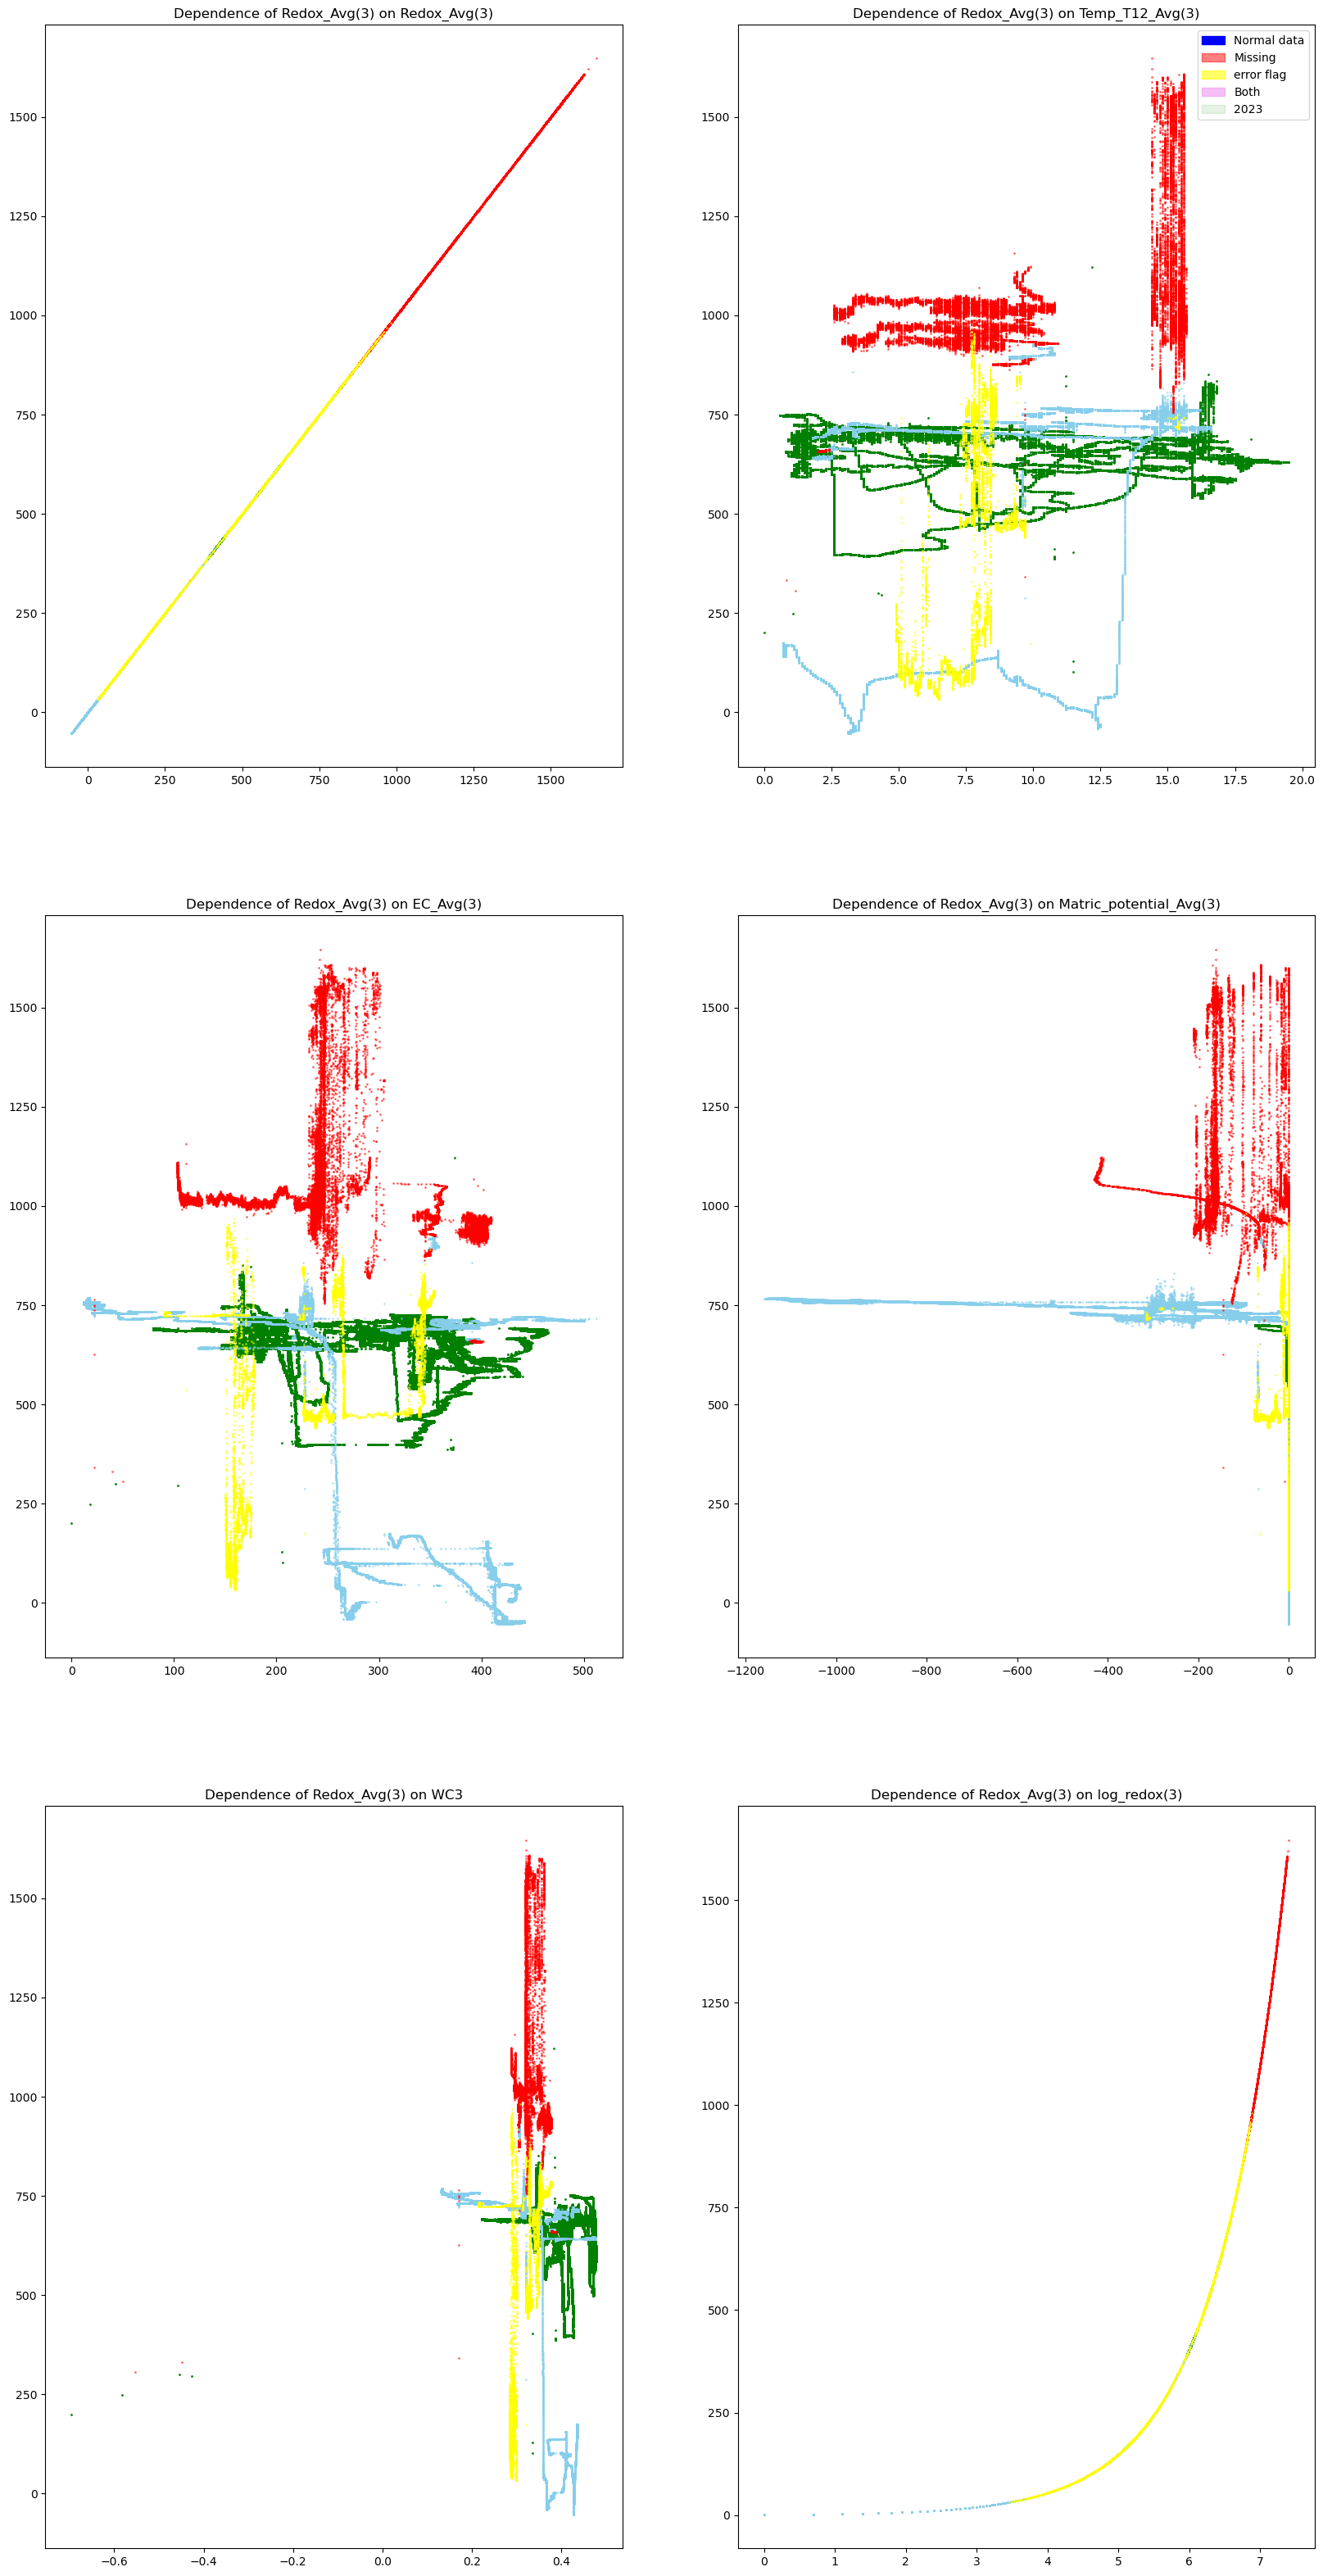

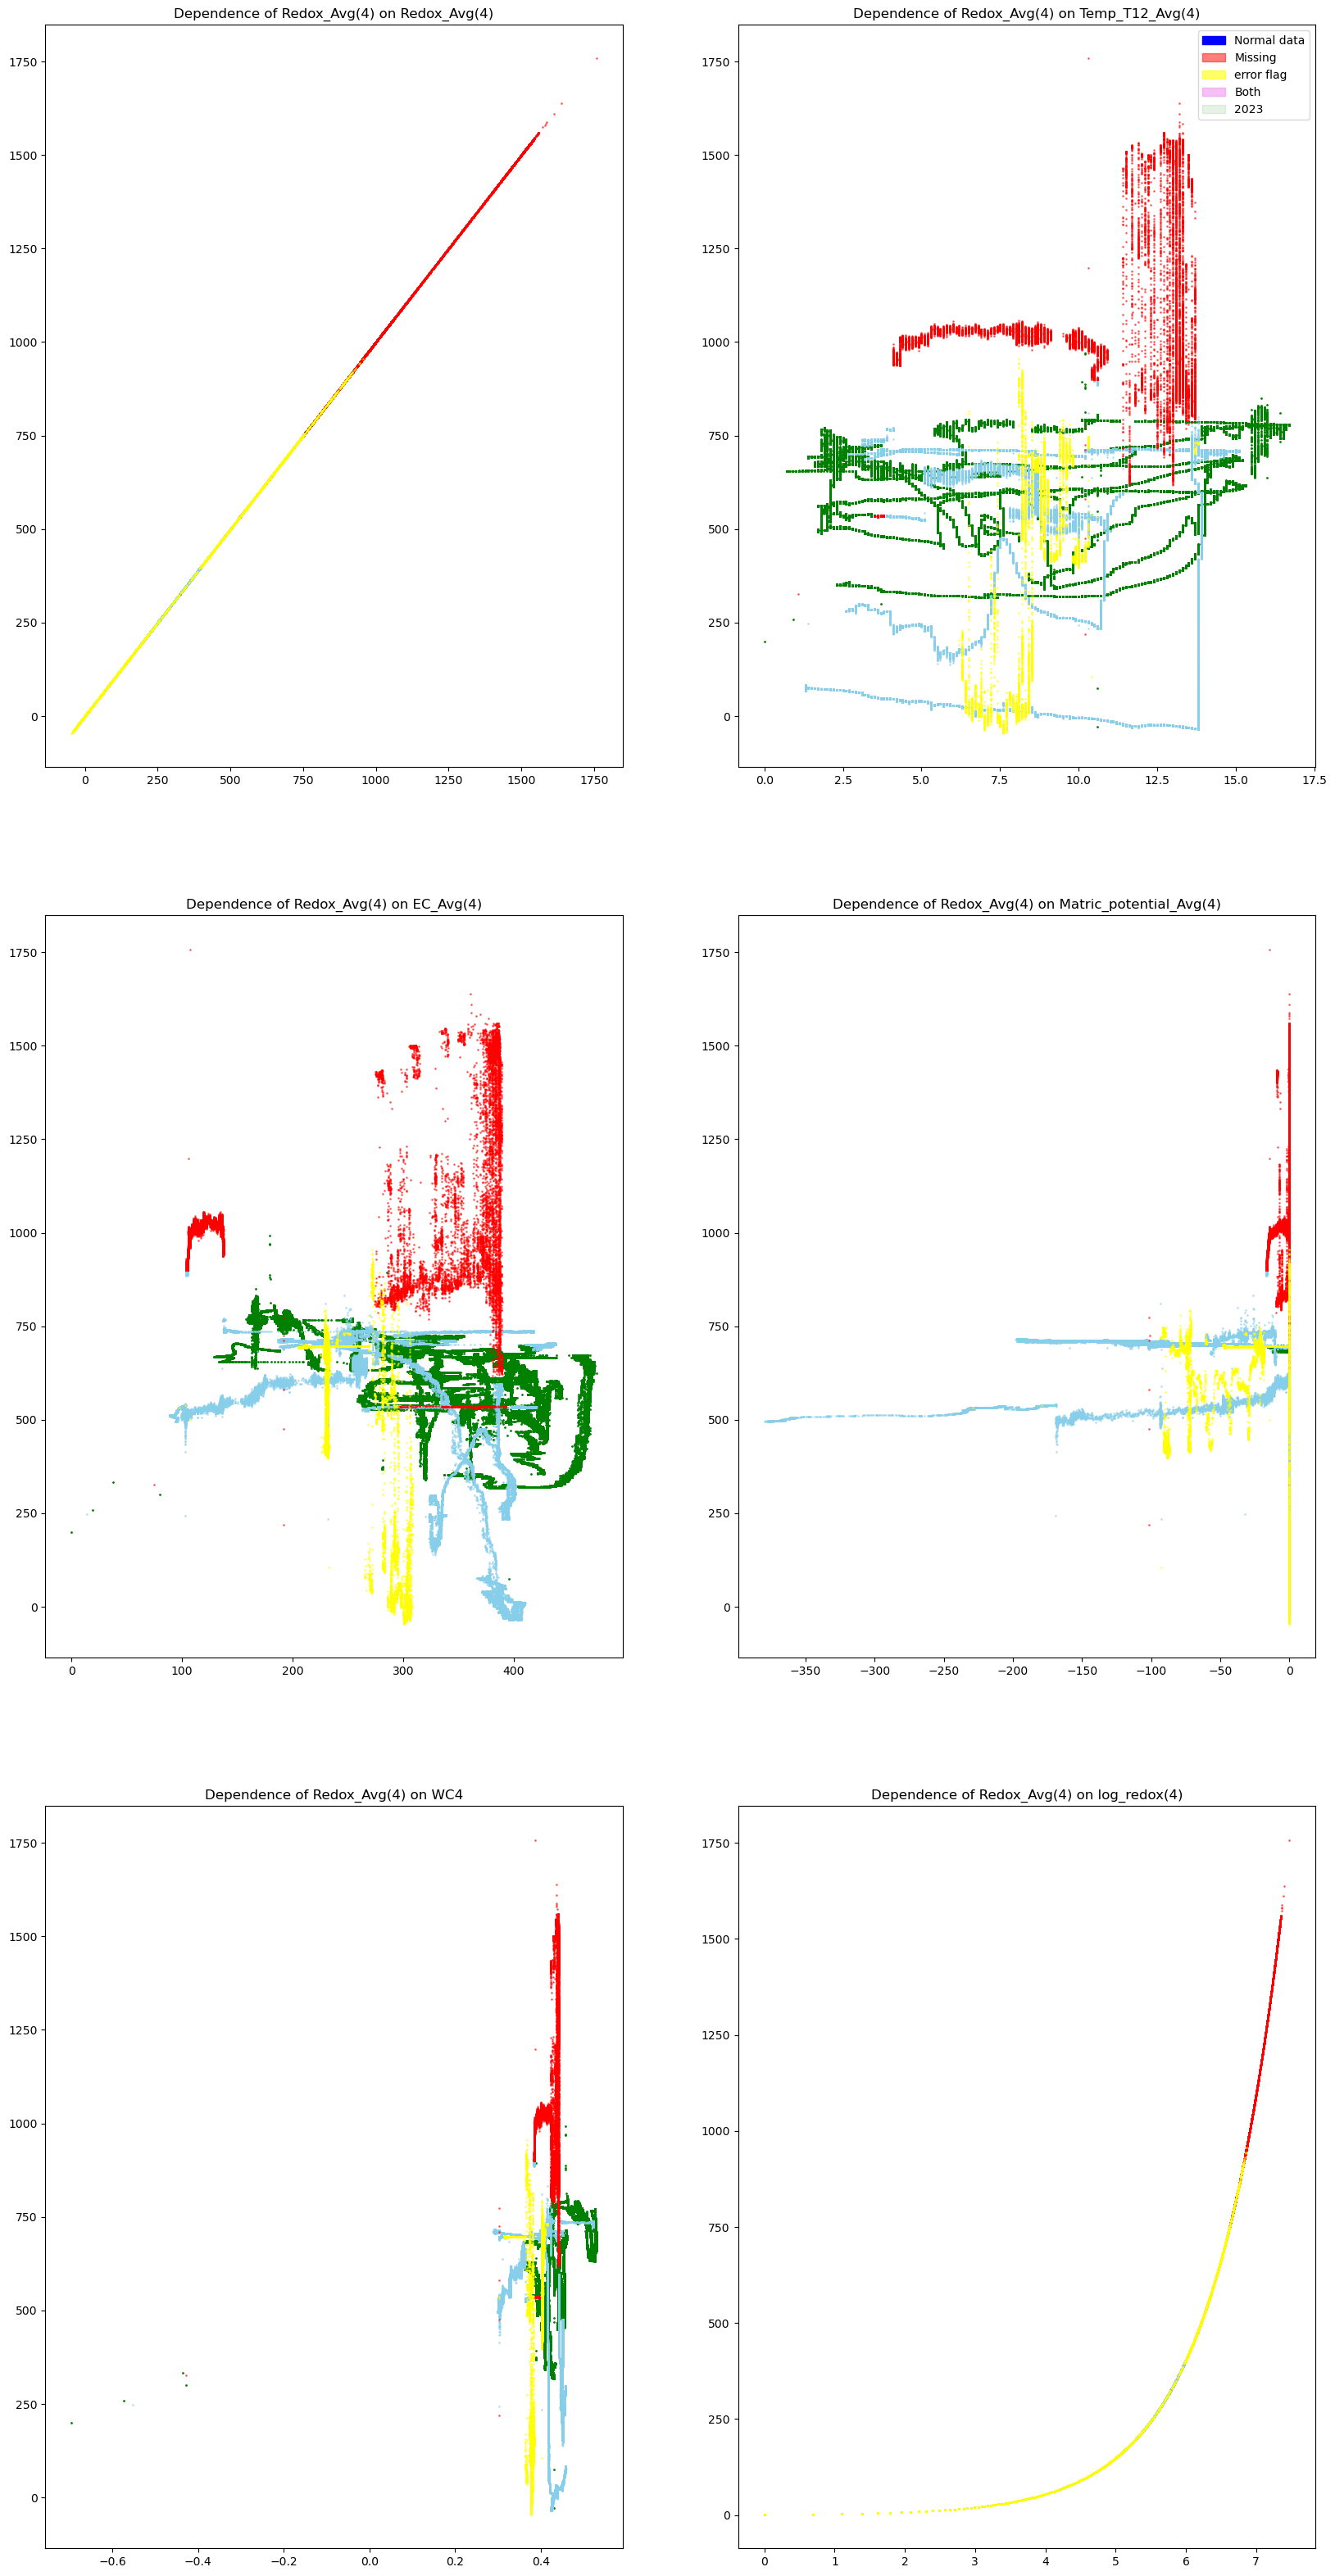

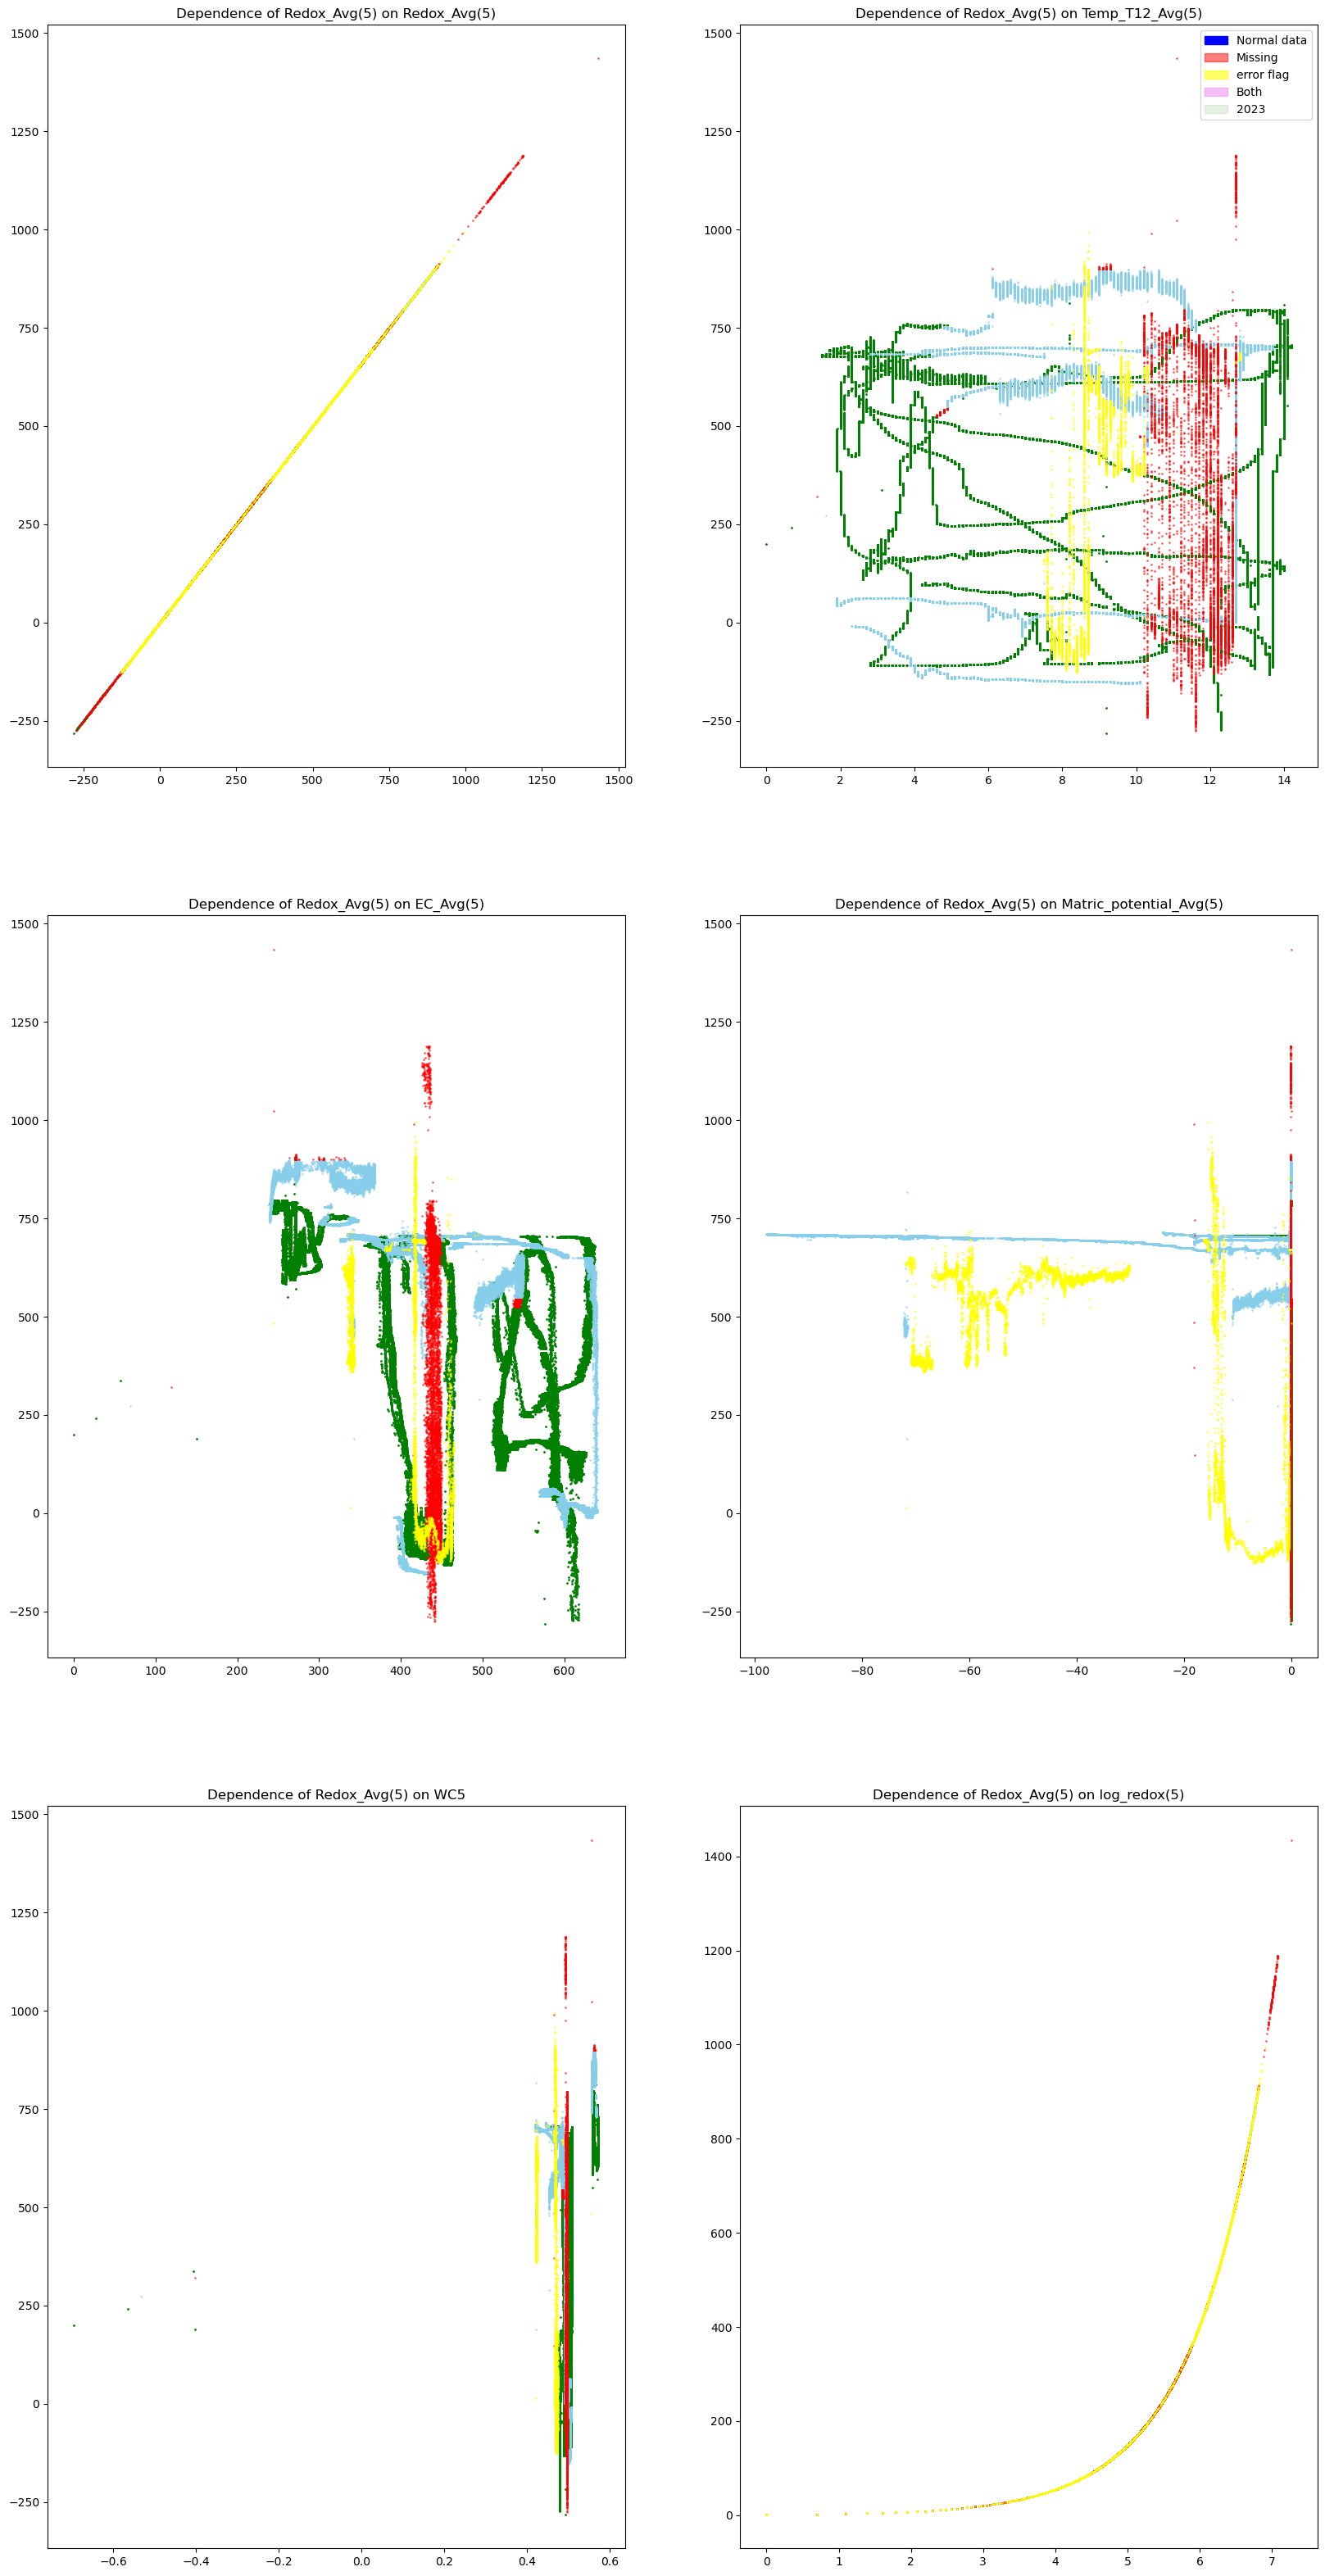

In [102]:
for error_flag_feature in ['Redox_error_flag(1)', 'Redox_error_flag(2)', 'Redox_error_flag(3)', 'Redox_error_flag(4)', 'Redox_error_flag(5)']:
        
        level_specific, j = sensor_specific_features(error_flag_feature)

        n = len(level_specific)
        
        fig, axes = plt.subplots(nrows = int(np.ceil(n/2)), ncols = 2, sharex = False, sharey = False, figsize = (20,40))
        
        c = df1[[error_flag_feature]+['Redox_error_flag']].apply(error_source, axis = 1)
        
        for i, sensor_feature in enumerate(level_specific):
            axes[int(i/2), i%2].scatter(df2[sensor_feature], df2["Redox_Avg("+str(j)+")"], s = 1, color = "green", alpha = 0.9999)
            axes[int(i/2), i%2].scatter(df1[c==0][sensor_feature], df1[c==0]["Redox_Avg("+str(j)+")"], s = 1, color = "skyblue", alpha = 0.5)
            axes[int(i/2), i%2].scatter(df1[c==1][sensor_feature],  df1[c==1]["Redox_Avg("+str(j)+")"], s =1, color = "red", alpha = 0.5)
            axes[int(i/2), i%2].scatter(df1[c==2][sensor_feature], df1[c==2]["Redox_Avg("+str(j)+")"], s = 1, color = "yellow", alpha = 0.5)
            axes[int(i/2), i%2].scatter(df1[c==3][sensor_feature], df1[c==3]["Redox_Avg("+str(j)+")"], s =1, color = "violet", alpha = 0.5)
            

            if(i == 1):
                axes[int(i/2), i%2].legend(handles = [blue_patch, red_patch, yellow_patch, violet_patch, green_patch])
            axes[int(i/2), i%2].set_title("Dependence of " + "Redox_Avg("+str(j)+")" + " on " + sensor_feature)
            
plt.show()

In [19]:
df2.columns

Index(['TIMESTAMP', 'Redox_Avg(1)', 'Redox_Avg(2)', 'Redox_Avg(3)',
       'Redox_Avg(4)', 'Redox_Avg(5)', 'Temp_T12_Avg(1)', 'EC_Avg(1)',
       'Temp_T12_Avg(2)', 'EC_Avg(2)', 'Temp_T12_Avg(3)', 'EC_Avg(3)',
       'Temp_T12_Avg(4)', 'EC_Avg(4)', 'Temp_T12_Avg(5)', 'EC_Avg(5)',
       'Matric_potential_Avg(1)', 'Matric_potential_Avg(2)',
       'Matric_potential_Avg(3)', 'Matric_potential_Avg(4)',
       'Matric_potential_Avg(5)', 'Water_level_Avg', 'Temp_ottpls_Avg',
       'BatterymV_Min', 'WC1', 'WC2', 'WC3', 'WC4', 'WC5', 'pit_number',
       'Redox_error_flag(1)', 'Redox_error_flag(2)', 'Redox_error_flag(3)',
       'Redox_error_flag(4)', 'Redox_error_flag(5)', 'Redox_error_flag',
       'Redox_error_flag_available'],
      dtype='object')

### Below are some left overs - to review and delete 

In [ ]:
cols = [col for col in data.columns if data[col].dtype == "bool"]

cols = cols[0:-1]

n = len(cols)

print(f"number of bool columns - {n}")

fig, axes = plt.subplots(nrows = 1, ncols = 2, sharex = False, sharey = False, figsize = (10,5))

for i, col in enumerate(cols):
    if df[col].dtype == "bool":
        data_by_col = data[[col] + ["Redox_error_flag"]].groupby(col).agg(func = sum)
        data_by_col_2 = data[[col] + ["Redox_error_flag"]].groupby(col).agg(func = lambda x: len(x) - sum(x))
        # print(data_by_col)
        # print(data_by_col_2)
        axes[i].bar(x = data_by_col.index, height = data_by_col["Redox_error_flag"], color = "skyblue")
        axes[i].bar(x = data_by_col.index, height = data_by_col_2["Redox_error_flag"], color = "green", alpha = 0.5)
        axes[i].set_title(col)
        if i == 1:
            skyblue_patch = patches.Patch(color='skyblue', label= 'Erroneous data')
            green_transparent_patch = patches.Patch(color = "green", alpha = 0.5, label = "Correct data")
            axes[i].legend(handles = [skyblue_patch, green_transparent_patch])

In [ ]:
cols = [col for col in df.columns if df[col].dtype == "float64"]
n = len(cols)
print(f"number of float64 columns - {n}")

fig, axes = plt.subplots(nrows = int(np.ceil(n / 2)), ncols = 2, sharex = False, sharey = False, figsize = (10,80))

for i, col in enumerate(cols):
    if df[col].dtype == "float64":
        axes[int(i/2), i%2].hist(df[df["Redox_error_flag"] == True][col][~df[col].isnull()], color = "skyblue")
        axes[int(i/2), i%2].hist(df[df["Redox_error_flag"] == False][col][~df[col].isnull()], color = "green", alpha = 0.5)
        axes[int(i/2), i%2].set_title(col)
        if i == 1:
            skyblue_patch = patches.Patch(color='skyblue', label= 'Erroneous data')
            green_transparent_patch = patches.Patch(color = "green", alpha = 0.5, label = "Correct data")
            axes[int(i/2), i%2].legend(handles = [skyblue_patch, green_transparent_patch])
        
#skyblue_patch = patches.Patch(color='skyblue', label= 'Erroneous data')
#green_transparent_patch = patches.Patch(color = "green", alpha = 0.5, label = "Correct data")
#plt.legend(handles = [skyblue_patch, green_transparent_patch])
            



cols = [col for col in data.columns if data[col].dtype == "float64"]
n = len(cols)
print(f"number of float64 columns - {n}")

fig, axes = plt.subplots(nrows = int(np.ceil(n / 2)), ncols = 2, sharex = False, sharey = False, figsize = (10,80))

for i, col in enumerate(cols):
    if data[col].dtype == "float64":
        
        axes[int(i/2), i%2].hist(data[data["Redox_error_flag"] == True][col][~data[col].isnull()], color = "skyblue")
        axes[int(i/2), i%2].hist(data[data["Redox_error_flag"] == False][col][~data[col].isnull()], color = "green", alpha = 0.5)
        axes[int(i/2), i%2].set_title(col)
        if i == 1:
            skyblue_patch = patches.Patch(color='skyblue', label= 'Erroneous data')
            green_transparent_patch = patches.Patch(color = "green", alpha = 0.5, label = "Correct data")
            axes[int(i/2), i%2].legend(handles = [skyblue_patch, green_transparent_patch])

In [ ]:
plt.subplots_adjust(hspace = 1.0) 

# df = df.loc[(df["TIMESTAMP"] > datetime.datetime(2022, 10, 1)) & (df["TIMESTAMP"]< datetime.datetime(2022, 12, 31)),:]

for pit in np.arange(1,5):
    
    print(f"------------------------------------------------------------------------ graphs of the variables for the pit # {pit} -----------------------------------------------------------------------------------------------")
    print(f"------------------------------------------------------------------------ graphs of the variables for the pit # {pit} -----------------------------------------------------------------------------------------------")
    
    df_pit = df.loc[df["pit_number"] == pit, :]
    
    features = list()
    
    for error_flag_feature in ['Redox_error_flag(1)', 'Redox_error_flag(2)', 'Redox_error_flag(3)', 'Redox_error_flag(4)', 'Redox_error_flag(5)']:
        
        level_specific, j = sensor_specific_features(error_flag_feature)
        
        level_specific_map = [(x, error_flag_feature) for x in level_specific]
        
        features.append(level_specific_map)
    
    features_zip = zip(*features)
    
    #print(*features_zip)
    #print("A")
    # print(*features_zip)
    
    fig, axes = plt.subplots(nrows = 5, ncols = 1, figsize = (20,30))
    
    # print([i for x,i in enumerate(features_zip)])
    
    for i, sensor_feature_all_depths in enumerate(features_zip):
        for (depth_feature, error_feature) in sensor_feature_all_depths:
            # df_plot = df_pit.loc[:, ["TIMESTAMP"]+[depth_feature]]
            # df_plot = df.loc[:, ["TIMESTAMP"]+[sensor_feature]]
            # df_plot.dropna(inplace = True)
            c = df_pit[[error_feature]+['Redox_error_flag']].apply(error_source, axis = 1)
            # c = df[[error_flag_feature]+['Redox_error_flag_available']].apply(error_source, axis = 1)
            scatter = axes[i].scatter(df_pit["TIMESTAMP"], df_pit[depth_feature], c = c, cmap = colors)

    # print(scatter.legend_elements()[0])
        axes[i].legend(handles = scatter.legend_elements()[0], labels=classes)
        axes[i].set_title(f"{depth_feature}")   
        
    plt.show()

In [ ]:
from matplotlib.colors import ListedColormap

def error_source(x):
    if ((x[0] == 0) & (x[1] == 0)): return 0
    elif ((x[0] == 1) & (x[1] == 0)): return 1
    elif ((x[0] == 0) & (x[1] == 1)): return 2
    else: return 3

df_plot = df[df.pit_number == 1].loc[:, ["TIMESTAMP", "Temp_T12_Avg(1)"]]

df_plot.dropna(inplace = True)

c = df[df.pit_number == 1][["Redox_error_flag(1)", 'Redox_error_flag_available']].apply(error_source, axis = 1)

classes = ["Normal", "missing redox", "error_flag", "both"]

colors = ListedColormap(["blue", "red", "green", "orange"])

plt.figure(figsize = (30,5))

scatter = plt.scatter(df_plot["TIMESTAMP"], df_plot["Temp_T12_Avg(1)"], c = c, cmap = colors)

plt.legend(handles=scatter.legend_elements()[0], labels=classes)

In [ ]:
colors = {0: "blue", 1: "red"}
for i in np.unique(df.pit_number):
    df_i = df[df.pit_number == i]
    for column in features_to_look:
        for sensor in range(1,6):
            error_flag_handle = "Redox_error_flag(" + str(sensor) + ")"
            fig = plt.figure(figsize = (20,20))
            df_plot = df_i.loc[:, ["TIMESTAMP"] + [column] + [error_flag_handle]]
            label = f"there are {sum(np.any(df_plot.isna(), axis = 1))} removed rows"
            print(label)
            # print(f"number of redox_error_flags = {sum(df_plot['Redox_error_flag(1)'])}")
            df_plot.dropna(inplace = True)
            plt.scatter(df_plot["TIMESTAMP"], df_plot[column], c = df_plot[error_flag_handle].apply(lambda x: colors[x]))
            plt.title(f"the dynamics of the feature {column} of the pit {i} for the sensor {sensor}")
            plt.ylabel(column)
            plt.show()

In [ ]:
colors = {0: "blue", 1: "red", 2: "green", 3: "orange"}

fig = plt.figure(figsize = (20,20))

c = df[df.pit_number == 3][["Redox_error_flag(1)", 'Redox_error_flag_available']].apply(error_source, axis = 1)

df_plot = df[df.pit_number == 3].loc[:, ["TIMESTAMP", "Temp_T12_Avg(1)"]]

df_plot.dropna(inplace = True)

plt.scatter(df_plot["TIMESTAMP"], df_plot["Temp_T12_Avg(1)"], c = c)
plt.legend()
plt.show()